# Machine Learning: AllLife Bank Personal Loan Campaign Project
*by: Gopesh Khandelwal*

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## <span style="color:blue">Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    classification_report,
)

import warnings
warnings.filterwarnings("ignore")

## <span style="color:blue">Loading the dataset

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
data_frame = pd.read_csv("/content/drive/My Drive/Loan_Modelling.csv")

In [4]:
# copying data to another variable to avoid any changes to original data
loan_data = data_frame.copy()

## <span style="color:blue">Data Overview

### View the first and last 5 rows of the dataset.

In [5]:
# returns the first 5 rows
loan_data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [6]:
# return the last 5 rows
loan_data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Understand the shape of the dataset.

In [7]:
# return the shape of the dataset
loan_data.shape

(5000, 14)

**Observations**
* The dataset consists of 5,000 rows and 14 columns, indicating there are 13 features and 1 target

### Check the data types of the columns for the dataset

In [8]:
# return the data types of the columns for the dataset
loan_data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

**Observations**
* Out of the columns, 13 contain integer values, while only the CCAvg column
consists of floating-point numbers

### Checking the Statistical Summary

In [9]:
# return the Statistical Summary
loan_data.describe(include="all")

ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [10]:
loan_data.T

0        1        2        3        4        5     \
ID                      1.0      2.0      3.0      4.0      5.0      6.0   
Age                    25.0     45.0     39.0     35.0     35.0     37.0   
Experience              1.0     19.0     15.0      9.0      8.0     13.0   
Income                 49.0     34.0     11.0    100.0     45.0     29.0   
ZIPCode             91107.0  90089.0  94720.0  94112.0  91330.0  92121.0   
Family                  4.0      3.0      1.0      1.0      4.0      4.0   
CCAvg                   1.6      1.5      1.0      2.7      1.0      0.4   
Education               1.0      1.0      1.0      2.0      2.0      2.0   
Mortgage                0.0      0.0      0.0      0.0      0.0    155.0   
Personal_Loan           0.0      0.0      0.0      0.0      0.0      0.0   
Securities_Account      1.0      1.0      0.0      0.0      0.0      0.0   
CD_Account              0.0      0.0      0.0      0.0      0.0      0.0   
Online                  0.0      0.0      0.0      0.0      0.0      1.0   
CreditCard              0.0      0.0      0.0      0.0      1.0      0.0   

                       6        7        8        9        10       11    \
ID                      7.0      8.0      9.0     10.0     11.0     12.0   
Age                    53.0     50.0     35.0     34.0     65.0     29.0   
Experience             27.0     24.0     10.0      9.0     39.0      5.0   
Income                 72.0     22.0     81.0    180.0    105.0     45.0   
ZIPCode             91711.0  93943.0  90089.0  93023.0  94710.0  90277.0   
Family                  2.0      1.0      3.0      1.0      4.0      3.0   
CCAvg                   1.5      0.3      0.6      8.9      2.4      0.1   
Education               2.0      3.0      2.0      3.0      3.0      2.0   
Mortgage                0.0      0.0    104.0      0.0      0.0      0.0   
Personal_Loan           0.0      0.0      0.0      1.0      0.0      0.0   
Securities_Account      0.0      0.0      0.0      0.0      0.0      0.0   
CD_Account              0.0      0.0      0.0      0.0      0.0      0.0   
Online                  1.0      0.0      1.0      0.0      0.0      1.0   
CreditCard              0.0      1.0      0.0      0.0      0.0      0.0   

                       12       13       14       15       16       17    \
ID                     13.0     14.0     15.0     16.0     17.0     18.0   
Age                    48.0     59.0     67.0     60.0     38.0     42.0   
Experience             23.0     32.0     41.0     30.0     14.0     18.0   
Income                114.0     40.0    112.0     22.0    130.0     81.0   
ZIPCode             93106.0  94920.0  91741.0  95054.0  95010.0  94305.0   
Family                  2.0      4.0      1.0      1.0      4.0      4.0   
CCAvg                   3.8      2.5      2.0      1.5      4.7      2.4   
Education               3.0      2.0      1.0      3.0      3.0      1.0   
Mortgage                0.0      0.0      0.0      0.0    134.0      0.0   
Personal_Loan           0.0      0.0      0.0      0.0      1.0      0.0   
Securities_Account      1.0      0.0      1.0      0.0      0.0      0.0   
CD_Account              0.0      0.0      0.0      0.0      0.0      0.0   
Online                  0.0      1.0      0.0      1.0      0.0      0.0   
CreditCard              0.0      0.0      0.0      1.0      0.0      0.0   

                       18       19       20       21       22       23    \
ID                     19.0     20.0     21.0     22.0     23.0     24.0   
Age                    46.0     55.0     56.0     57.0     29.0     44.0   
Experience             21.0     28.0     31.0     27.0      5.0     18.0   
Income                193.0     21.0     25.0     63.0     62.0     43.0   
ZIPCode             91604.0  94720.0  94015.0  90095.0  90277.0  91320.0   
Family                  2.0      1.0      4.0      3.0      1.0      2.0   
CCAvg                   8.1      0.5      0.9      2.0      1.2     

**Observations**
* ID: Ranges from 1 to 5000, with a mean of 2500.5, suggesting it's a simple sequential identifier.
* Age: The customers' ages range from 23 to 67, with a mean age of about 45.
* Experience: Years of professional experience vary from -3 (which may indicate data issues) to 43, with a mean of 20 years.
* Income: Annual income (in thousands of dollars) ranges widely from 8 to 224, with a median income of 64.
* ZIPCode: The ZIP codes range from 90005 to 96651, reflecting a wide geographical spread.
* Family: Family sizes range from 1 to 4, with an average size of approximately 2.4 members.
* CCAvg: Average spending on credit cards per month ranges from 0 to 10 (in thousands of dollars), with a median spending of 1.5.
* Education: Education levels range from 1 to 3, representing undergraduate to advanced/professional degrees.
* Mortgage: The value of house mortgages varies significantly from 0 to 635 (in thousands of dollars), with 75% of customers having no or low mortgage value.
* Personal_Loan: About 9.6% of customers accepted the personal loan offered in the last campaign (1 = Yes, 0 = No).
* Securities_Account: 10.4% of customers have a securities account with the bank (1 = Yes, 0 = No).
* CD_Account: 6.04% of customers have a certificate of deposit (CD) account with the bank (1 = Yes, 0 = No).
* Online: 59.68% of customers use internet banking facilities (1 = Yes, 0 = No).
* CreditCard: 29.4% of customers use a credit card issued by the bank (1 = Yes, 0 = No).

In [11]:
# checking for unique values in ID column
loan_data["ID"].nunique()

5000

**Observations**
* The dataset comprises 5,000 unique "ID" values, indicating each entry is distinct based on its identifier, ensuring no duplicates are present based on "ID"

### Calculate the distribution of the target variable 'Personal_Loan'

In [12]:
# Calculate the distribution of the target variable 'Personal_Loan'
target_distribution_percentage = loan_data['Personal_Loan'].value_counts(normalize=True) * 100

target_distribution_percentage

Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64

**Observations**
The target variable "Personal_Loan" distribution in the dataset is:

* 90.4% of customers did not accept the personal loan.
* 9.6% of customers accepted the personal loan.

This highlights a **significant imbalance** in the dataset towards customers not opting for the personal loan.

### Calculate missing values

In [13]:
# Calculate missing values
missing_values_check = loan_data.isnull().sum()

missing_values_check

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

**Observations**
* The dataset has no missing values in any of its columns.

### A summary of data observations and sanity Checks

**Observation**
The dataset comprises 5,000 entries, representing individual customers, and 14 features including both customer attributes and their banking behaviors. The primary aim is to predict the likelihood of a customer accepting a personal loan offer based on these attributes. Key observations include:


*   Target Variable: The Personal_Loan column, our target variable, indicates whether a customer accepted a personal loan offer. About 9.6% of customers accepted the loan, highlighting a significant class imbalance that must be addressed during modeling.
*   Customer Demographics: Features like Age, Experience, and Family size offer insights into the demographic profile of the bank's customers. These features could potentially influence a customer's decision to accept a personal loan.
*   Financial Behaviors: Variables such as Income, CCAvg (average credit card spending), and Mortgage provide a glimpse into the financial health and spending habits of customers. Notably, the dataset includes information on whether customers utilize other banking products like Securities_Account, CD_Account, Online banking services, and CreditCard.
*   Data Types: The dataset contains a mix of numerical and categorical variables, with categorical data already encoded numerically, facilitating straightforward use in statistical models.





**Sanity Checks**

*   **Plausible Ranges and Values:** The first check shows everything looks good except for Experience, which has some issues like negative values. We need to clean up Experience data. Also, a closer look might find other odd or interesting patterns to explore.
*   **Missing Values:** No missing values were detected across all features, indicating a complete dataset and obviating the need for imputation strategies.
*   **Data Types and Consistency:** Each feature's data type is consistent with its expected content (e.g., numerical for continuous variables and integer-encoded for categorical variables), ensuring computational models can be applied without type conversion errors.
*   **Class Distribution:** The target variable's class imbalance was noted, with a significant majority of customers not accepting personal loan offers. This distribution mirrors real-world scenarios where only a subset of customers might accept such offers but requires careful handling during model training to prevent bias.


## <span style="color:blue">Data Preprocessing

### ID column treatment

In [14]:
# checking for unique values in ID column
loan_data["ID"].nunique()

5000

*   Since all the values in ID column are unique we can drop it




In [15]:
loan_data.drop(["ID"], axis=1, inplace=True)

### Missing value treatment

In [16]:
# Check for missing values in the dataset
loan_data.isnull().sum()


Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

**Missing value treatment**
Dataset does not have any missing values. Each column was reported to have 5000 non-null entries. So our dataset does not require any missing value treatment.

### Anomalous Value treatment

The **Experience** column has negative values needing fixing. Since the rows with these values also have important data, we shouldn't drop them. Let's change the negative values to their absolute values

In [17]:
loan_data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [18]:
# checking for experience <0
loan_data[loan_data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [19]:
# Convert negative values to absolute values in the 'Experience' column
loan_data['Experience'] = loan_data['Experience'].abs()

In [20]:
loan_data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

### Feature engineering

#### ZIPCode handling

We'll adjust the handling of the ZIPCode by considering only the first two digits, converting it to a string, and then treating it as a categorical variable. This approach reduces the dimensionality and captures geographical regions more broadly.

In [21]:
# checking the number of uniques in the zip code
loan_data["ZIPCode"].nunique()

467

In [22]:
loan_data["ZIPCode"] = loan_data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    loan_data["ZIPCode"].str[0:2].nunique(),
)
loan_data["ZIPCode"] = loan_data["ZIPCode"].str[0:2]

loan_data["ZIPCode"] = loan_data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


#### Categorical features handling

> Let's convert the datatype of the categorical features to category for efficiency

In [23]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
loan_data[cat_cols] = loan_data[cat_cols].astype("category")

In [24]:
loan_data.dtypes

Age                      int64
Experience               int64
Income                   int64
ZIPCode               category
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal_Loan         category
Securities_Account    category
CD_Account            category
Online                category
CreditCard            category
dtype: object

## <span style="color:blue">Exploratory Data Analysis

### Common functions
The initial phase of univariate analysis involves examining the data's distribution or spread, primarily through the use of histograms and box plots. To facilitate this, we are developing common functions, which will be responsible for plotting data distribution

In [25]:
# function to create histogram boxplot

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [26]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [27]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [28]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Observations on Age

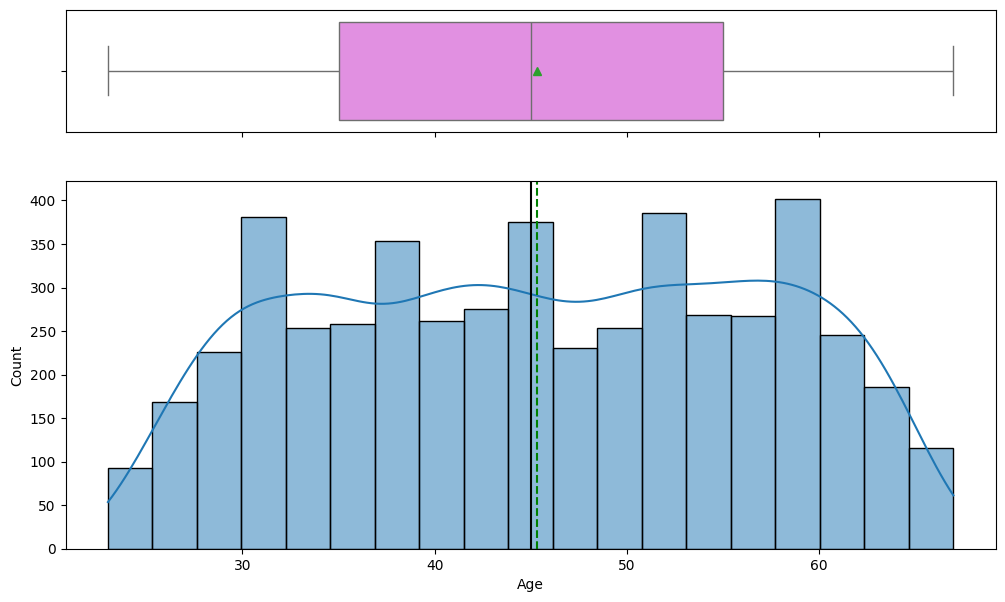

In [29]:
histogram_boxplot(loan_data, "Age", kde=True)

**Observations**
* The "Age" distribution is uniform across different age groups.
* Most customers are middle-aged (45).
* There are no significant outliers in the age data.

#### Observations on Experience

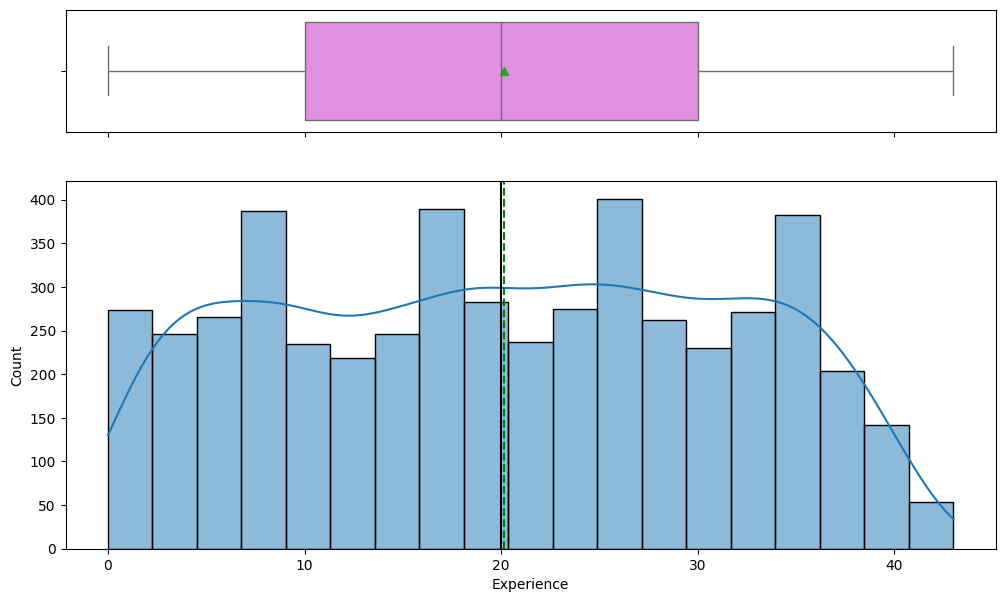

In [30]:
histogram_boxplot(loan_data,"Experience", kde=True)

**Observations**
* The distribution of "Experience" is generally even, though it features four distinct peaks.
* The minimum reported experience is 0 years.
* The maximum reported experience extends to 43 years.
* Both the mean and median experiences hover around 20 years, indicating a central clustering of experience levels

#### Observations on Income

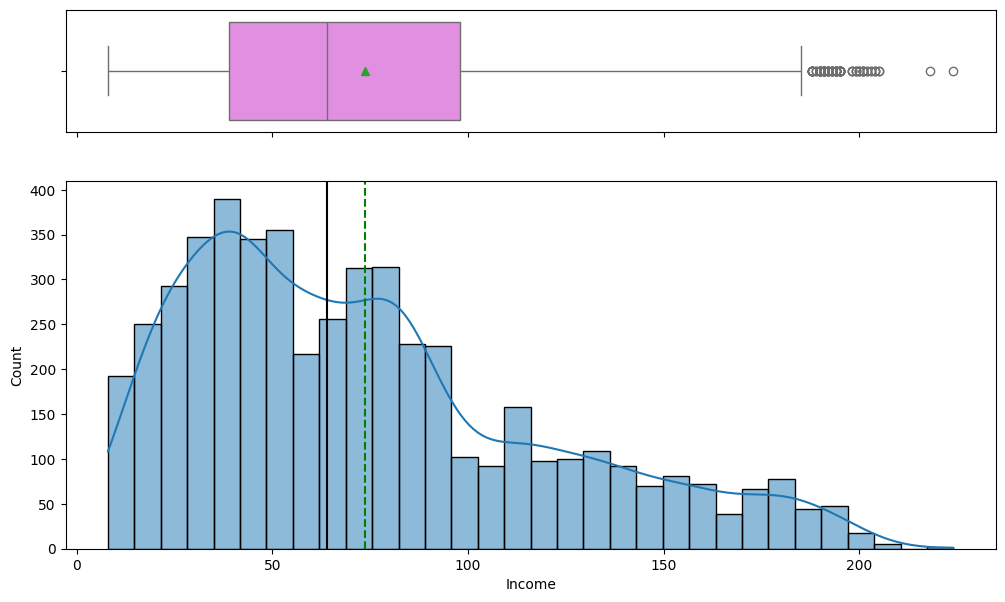

In [31]:
histogram_boxplot(loan_data,"Income", kde=True)

**Observations**
* The average (mean) income among the customers is approximately `$73.77k`.
* The standard deviation is about `$46.03k`, indicating a wide variation in income levels.
* Income ranges from a minimum of `$8k` to a maximum of `$224k`.
* The median income (50th percentile) is `$64k`, suggesting that half of the customers earn less than this amount and half earn more.
* The first quartile (25th percentile) is at `$39k`, and the third quartile (75th percentile) is at `$98k`, highlighting that the middle 50% of customers' incomes fall within this range

#### Observations on CCAvg

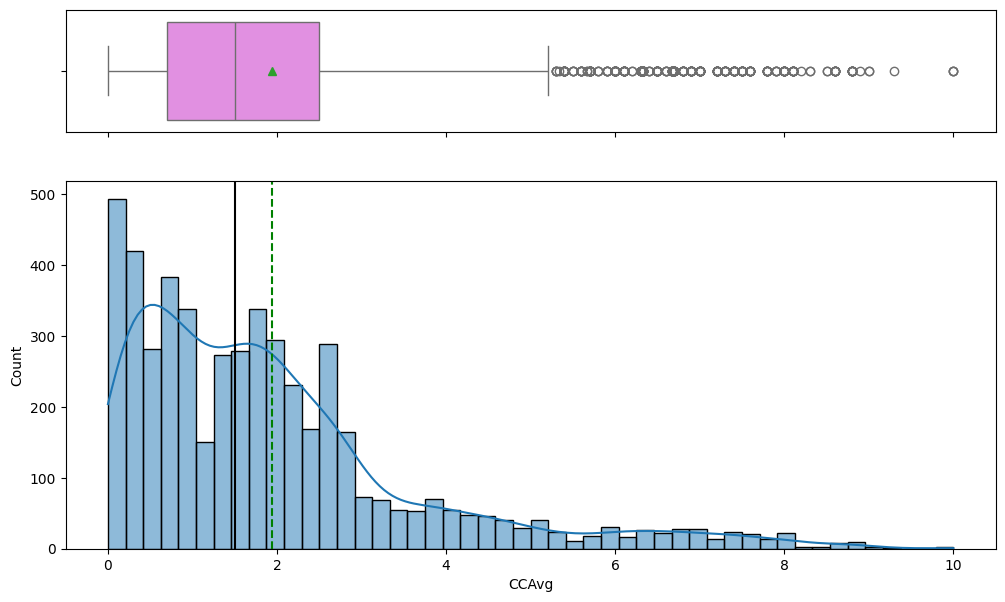

In [32]:
histogram_boxplot(loan_data,"CCAvg", kde=True)

**Observations**

* The average monthly credit card spending is approximately `$1.94k1`.
* The standard deviation is around `$1.75k`, indicating variability in how much customers spend.
* Monthly spending ranges from a minimum of `$0` (some customers do not spend at all) to a maximum of `$10k`.
* The median spending (50th percentile) is `$1.5k`, meaning half of the customers spend less than this amount and half spend more.
* The first quartile (25th percentile) at `$0.7k` and the third quartile (75th percentile) at `$2.5k` show that the central 50% of the customers' monthly spending lies within this range.
* The skewness value is approximately 1.60, indicating a right-skewed distribution

#### Observations on Mortgage

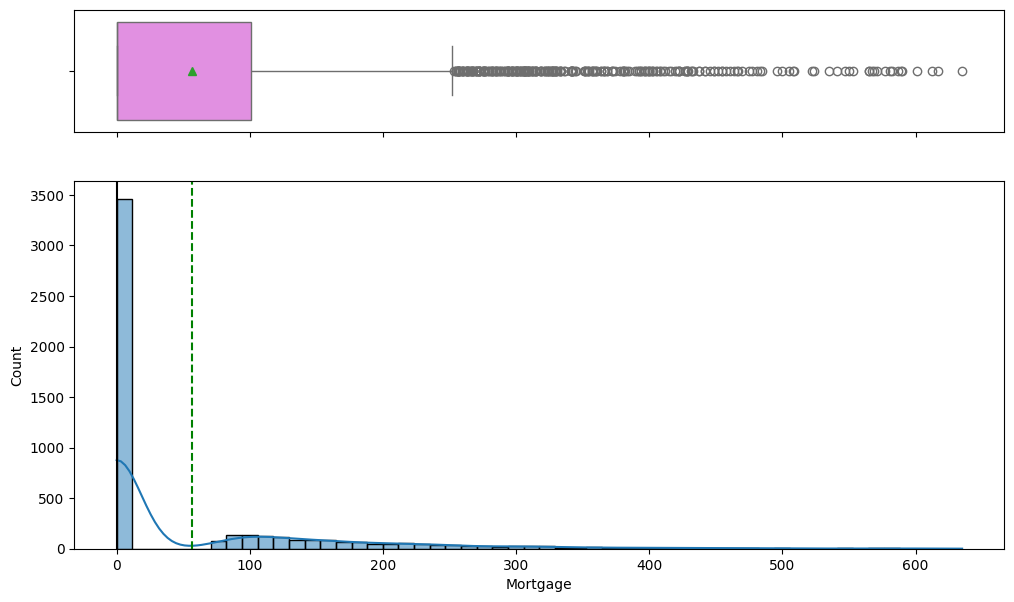

In [33]:
histogram_boxplot(loan_data,"Mortgage", kde=True)

**Observations**

* The average mortgage value is approximately `$56.5k`.
* The standard deviation is about `$101.71k`, indicating a wide range of mortgage values among customers.
* Mortgage values range from a minimum of `$0` (indicating customers without mortgages) to a maximum of `$635k`.
* The median mortgage value (50th percentile) is `$0`, showing that more than half of the customers do not have a mortgage.
* The first quartile (25th percentile) is also `$0`, and the third quartile (75th percentile) is `$101k`, highlighting that the upper 25% of customers have mortgage values above this range.
* The skewness value is approximately 2.10, indicating a highly right-skewed distribution. This suggests that while a large portion of customers have low or no mortgage values, there are a few customers with very high mortgage values, significantly affecting the distribution's tail.

#### Observations on Family

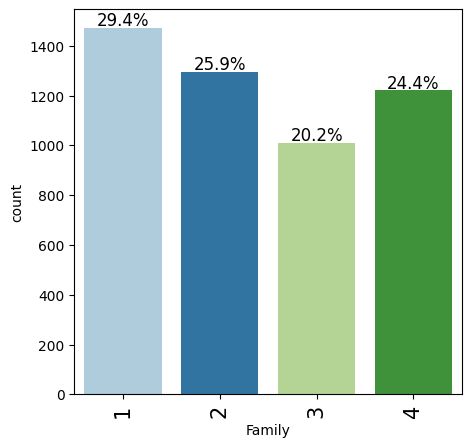

In [34]:
labeled_barplot(loan_data, "Family", perc=True)

**Observations**
* The largest category of the family column is 1, with a percentage of 29.44%.
* The second largest category is a family size of 2, with 25.92%, followed by a size of 4 with 24.44%.
* A family size of 3 constitutes the smallest portion of our dataset, with 20.20%

#### Observations on Education

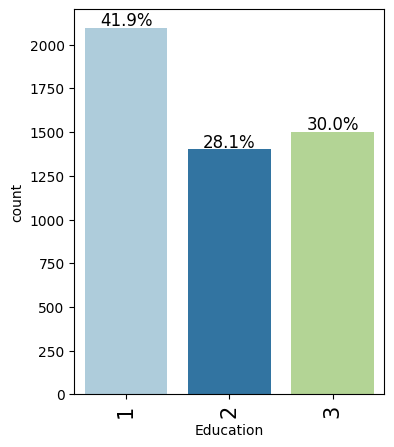

In [35]:
labeled_barplot(loan_data, "Education", perc=True)


**Observations**

* The largest educational category is level 1 (Undergraduate), making up 41.92% of the dataset.
* Level 3 (Advanced/Professional) is the second largest category, comprising 30.0%.
* Level 2 (Graduate) is the smallest educational category, accounting for 28.1% of the dataset.

#### Observations on Securities_Account

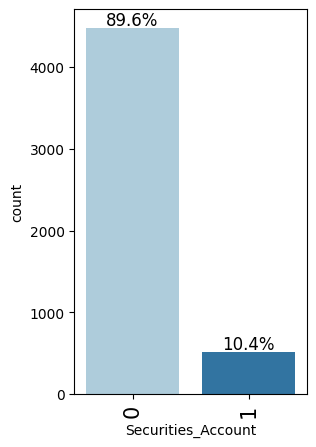

In [36]:
labeled_barplot(loan_data, "Securities_Account", perc=True)

**Observations**

* A majority, 89.6%, of customers do not have a securities account with the bank.
* Only 10.4% of customers have a securities account

#### Observations on CD_Account

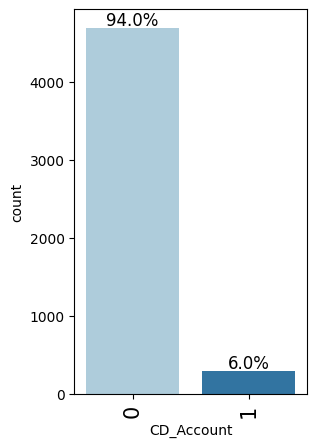

In [37]:
labeled_barplot(loan_data, "CD_Account", perc=True)

**Observations**

* A significant 94% of customers do not have a certificate of deposit (CD) account with the bank.
* Only 6.0% of customers possess a CD account

#### Observations on Online

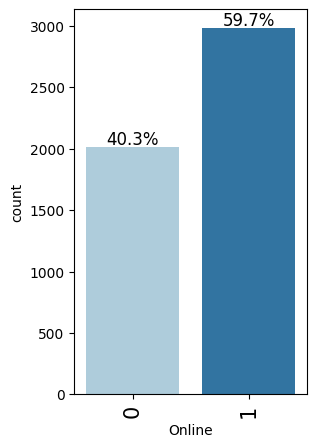

In [38]:
labeled_barplot(loan_data, "Online", perc=True)

**Observations**

* 59.7% of customers use internet banking facilities.
* The remaining 40.3% of customers do not use internet banking

#### Observation on CreditCard

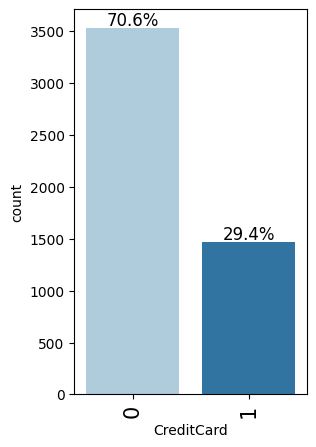

In [39]:
labeled_barplot(loan_data, "CreditCard", perc=True)

**Observations**

* 70.6% of customers do not use a credit card issued by the bank.
* Only 29.4% of customers use a credit card issued by the ban

#### Observation on ZIPCode

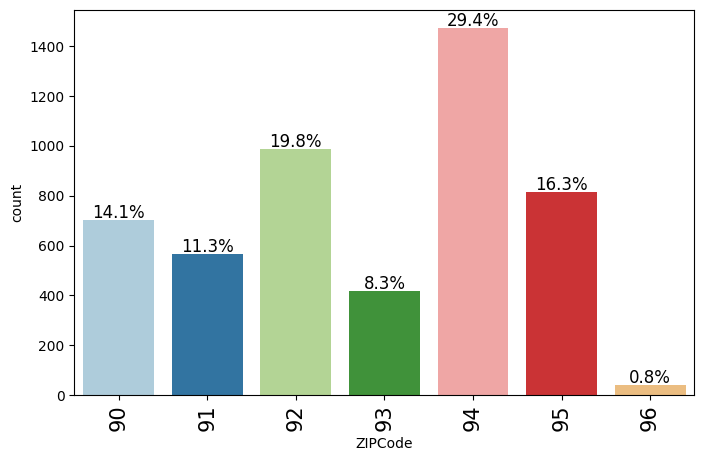

In [40]:
labeled_barplot(loan_data, "ZIPCode", perc=True)

**Observations**

* The distribution of ZIP codes is unevenly spread.
* The ZIP code starting with 94 has the highest number of customers (29.4%).
* The Second highest number of customers is found in the ZIP code starting with 92 (19.8%).
* The ZIP code starting with 96 has the lowest number of customers (0.8%).

### Bivariate Analysis

#### Correlation check

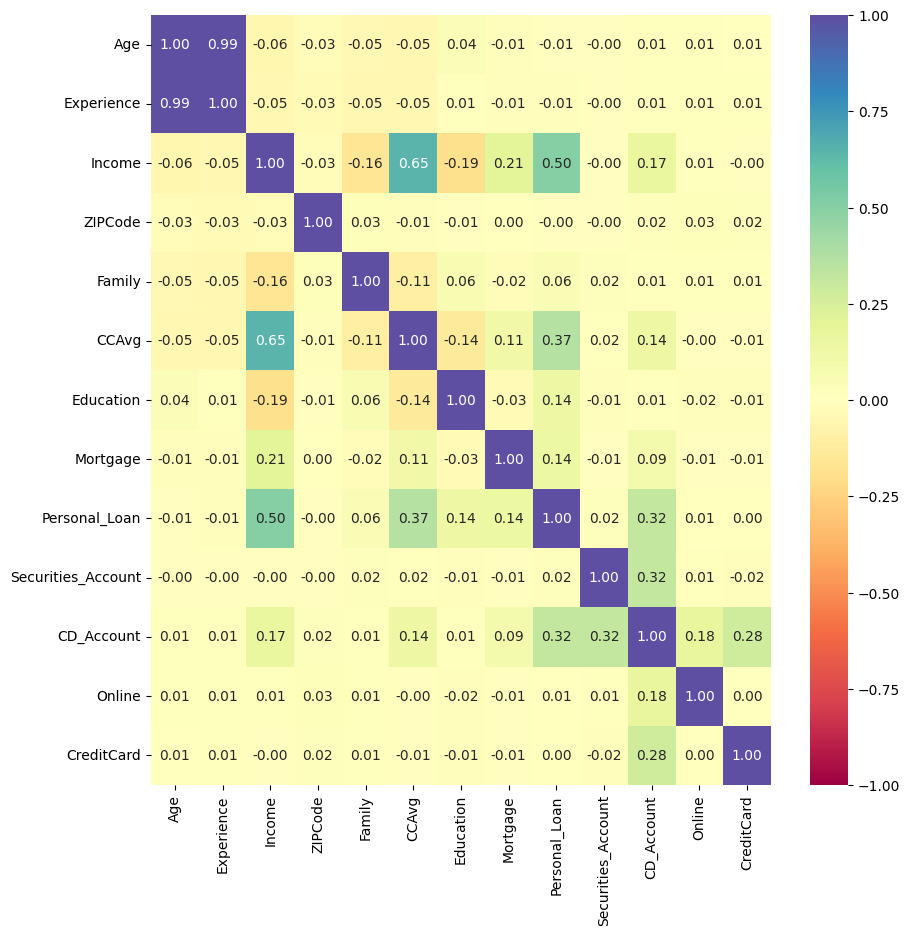

In [41]:
plt.figure(figsize=(10, 10))
sns.heatmap(loan_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**
* Income: Positive correlation (0.50), indicating higher income levels are associated with a greater likelihood of accepting a personal loan.

* CCAvg: Positive correlation (0.37), suggesting that higher average credit card spending per month is associated with a higher probability of taking a personal loan.

* CD_Account: Positive correlation (0.32), meaning customers with a certificate of deposit (CD) account are more likely to accept a personal loan.

* Education: Positive correlation (0.14), implying higher education levels are somewhat associated with a higher likelihood of taking a personal loan.

#### Personal Loan v/s Numeric columns

In [42]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

##### Age VS Personal_Loan


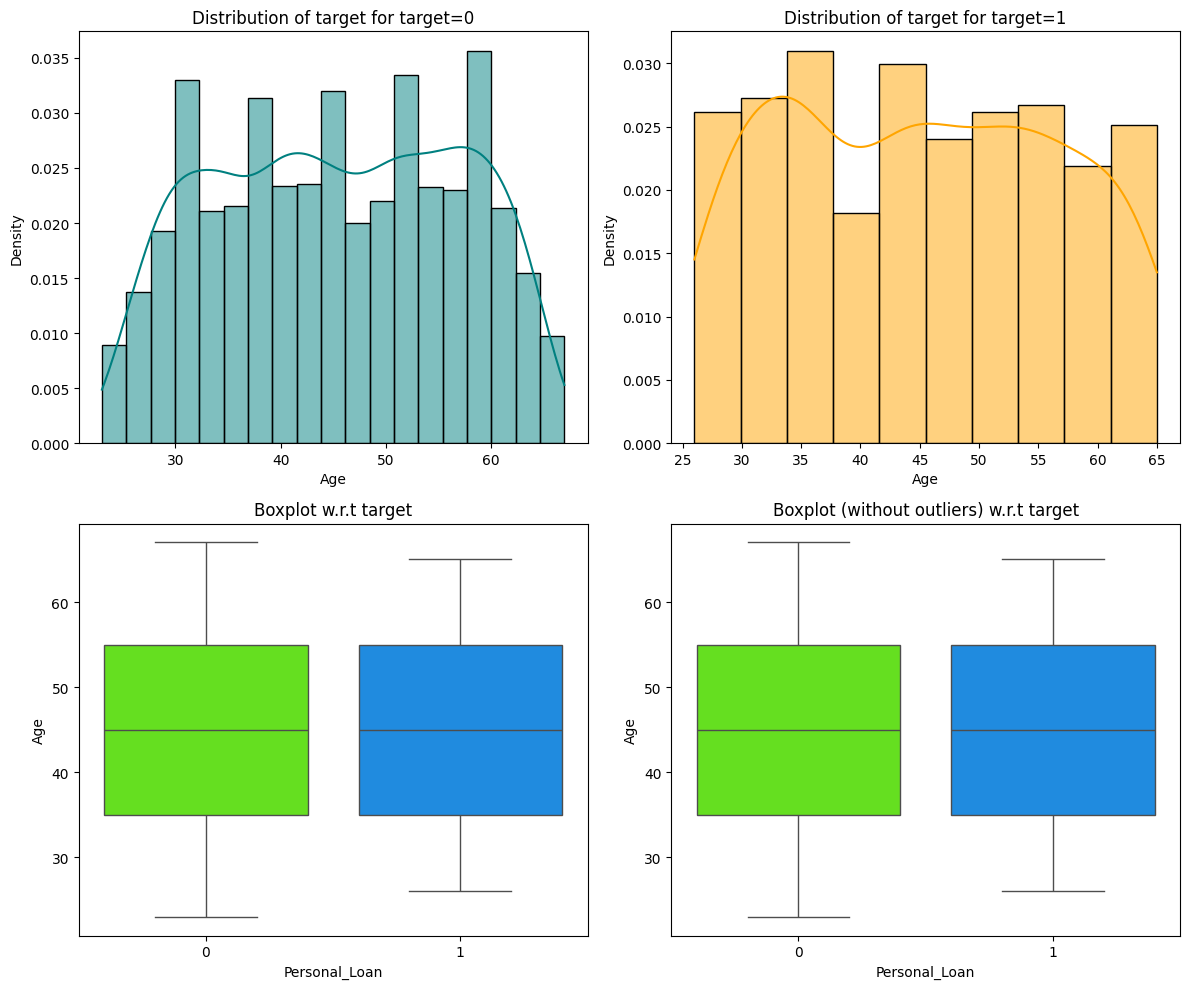

In [43]:
distribution_plot_wrt_target(loan_data,'Age','Personal_Loan')


>* The average age for customers who accept and those who don't accept personal
loans is nearly 45 years, as evident.
* As anticipated from the pair plot, age demonstrates minimal correlation with our target variable, indicating negligible predictive capability.

##### Experience VS Personal_Loan

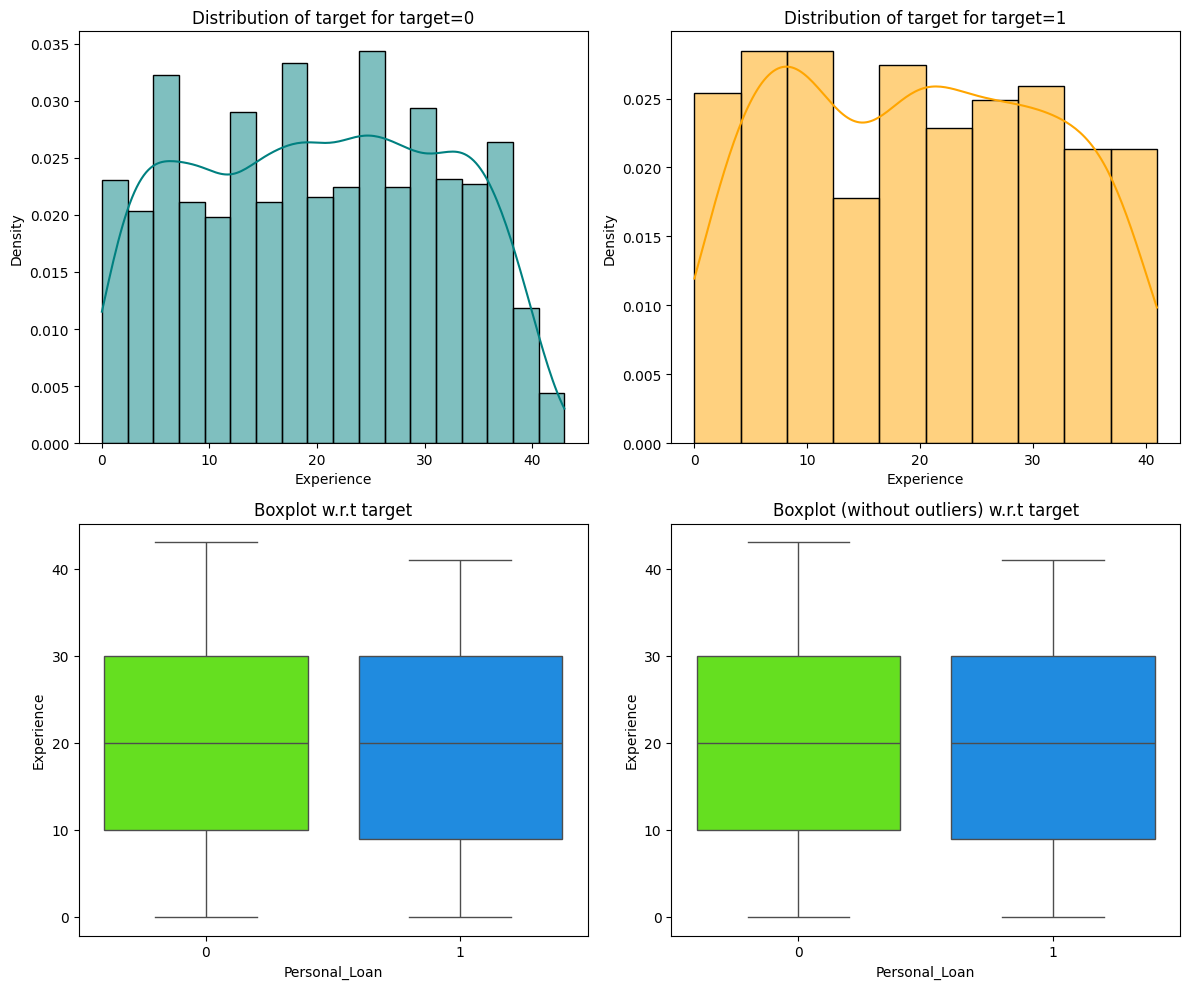

In [44]:
distribution_plot_wrt_target(loan_data,'Experience','Personal_Loan')


>* The average experience for customers who accept and those who don't accept personal loans is approximately 20 years, as noted.
* Consistent with the pair plot, experience exhibits no discernible correlation and therefore lacks predictive power concerning our target variable.

##### Income VS Personal_Loan

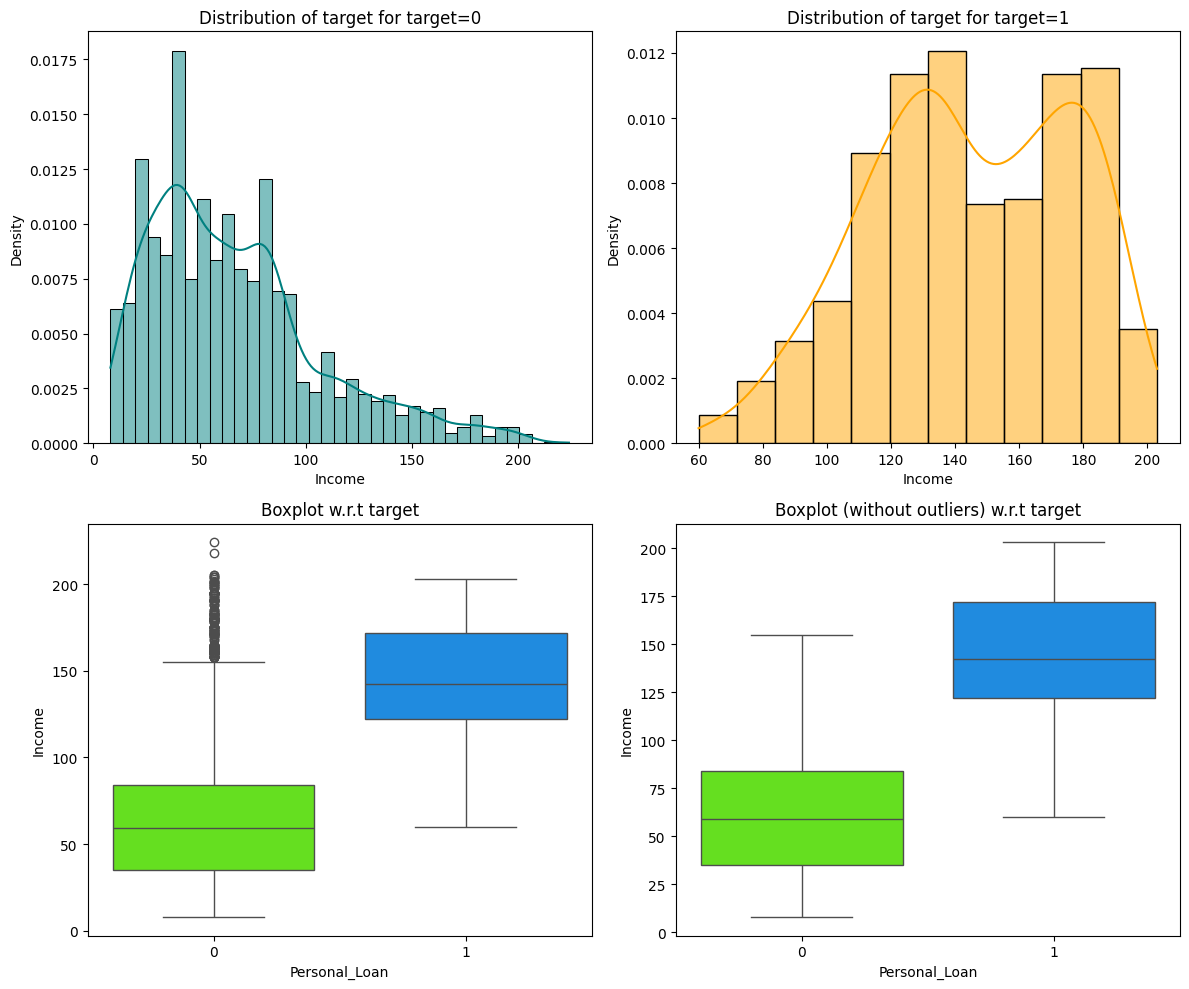

In [45]:
distribution_plot_wrt_target(loan_data,'Income','Personal_Loan')

>* As expected, the Income variable varies significantly between customers who accepted and did not accept the personal loan.
* The mean income for customers who did not accept the loan is approximately USD 65K.
* The mean income for customers who did accept the loan is approximately USD 145K.
* This illustrates that the income level of the customer heavily influences the decision to accept a personal loan. Higher income correlates with higher chances of accepting a personal loan.

##### Mortgage VS Personal_Loan

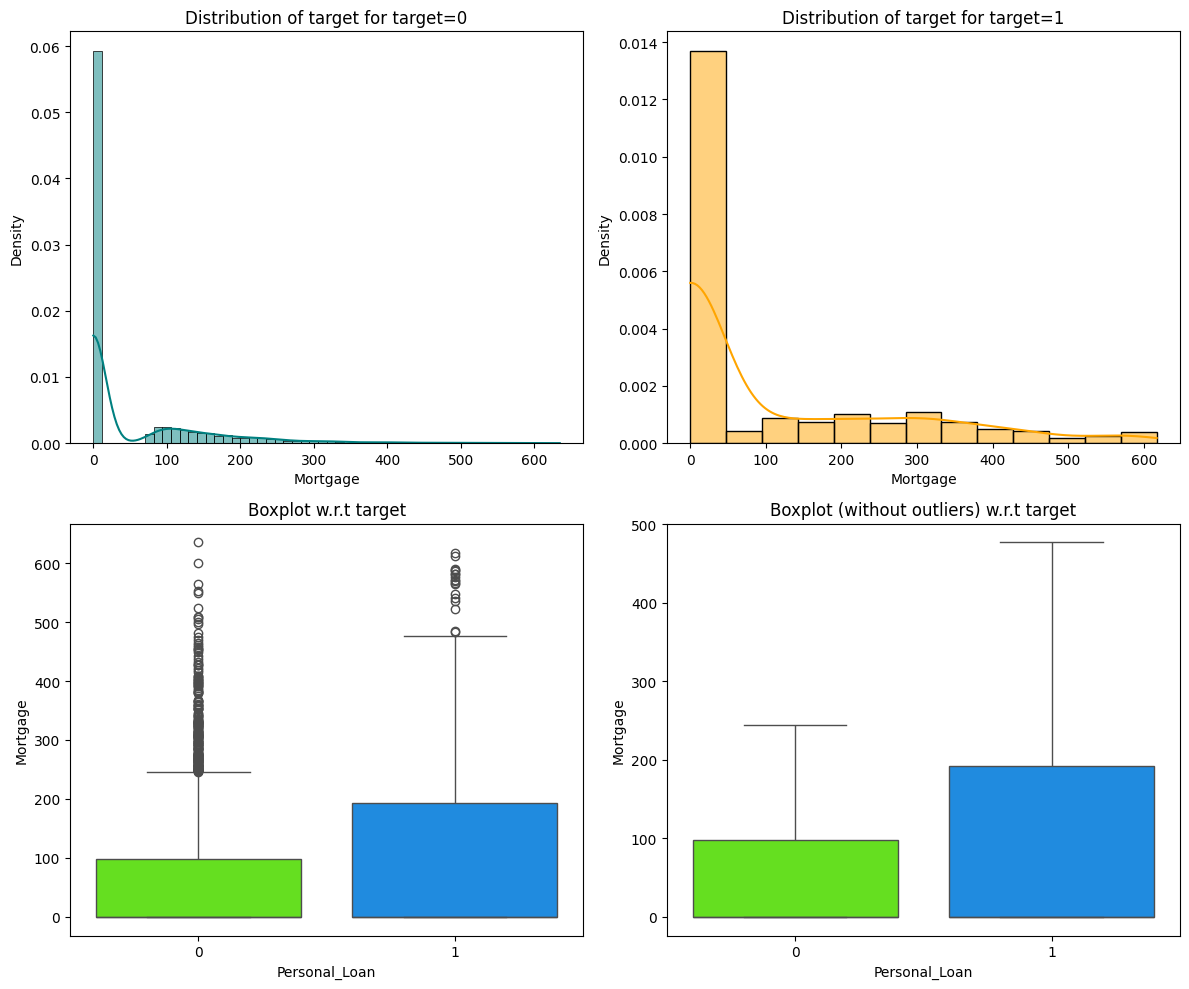

In [46]:
distribution_plot_wrt_target(loan_data,'Mortgage','Personal_Loan')

> Observations indicate that customers with mortgages are more inclined to accept personal loans. However, due to the heavily right-skewed distribution caused by the high number of customers without mortgages, we will focus on plotting the distribution of customers with mortgages, which are consolidated in the "mortgage" dataframe. This approach will provide a clearer insight into the mean mortgage value for customers accepting versus those not accepting a personal loan

##### CCAvg VS Personal_Loan

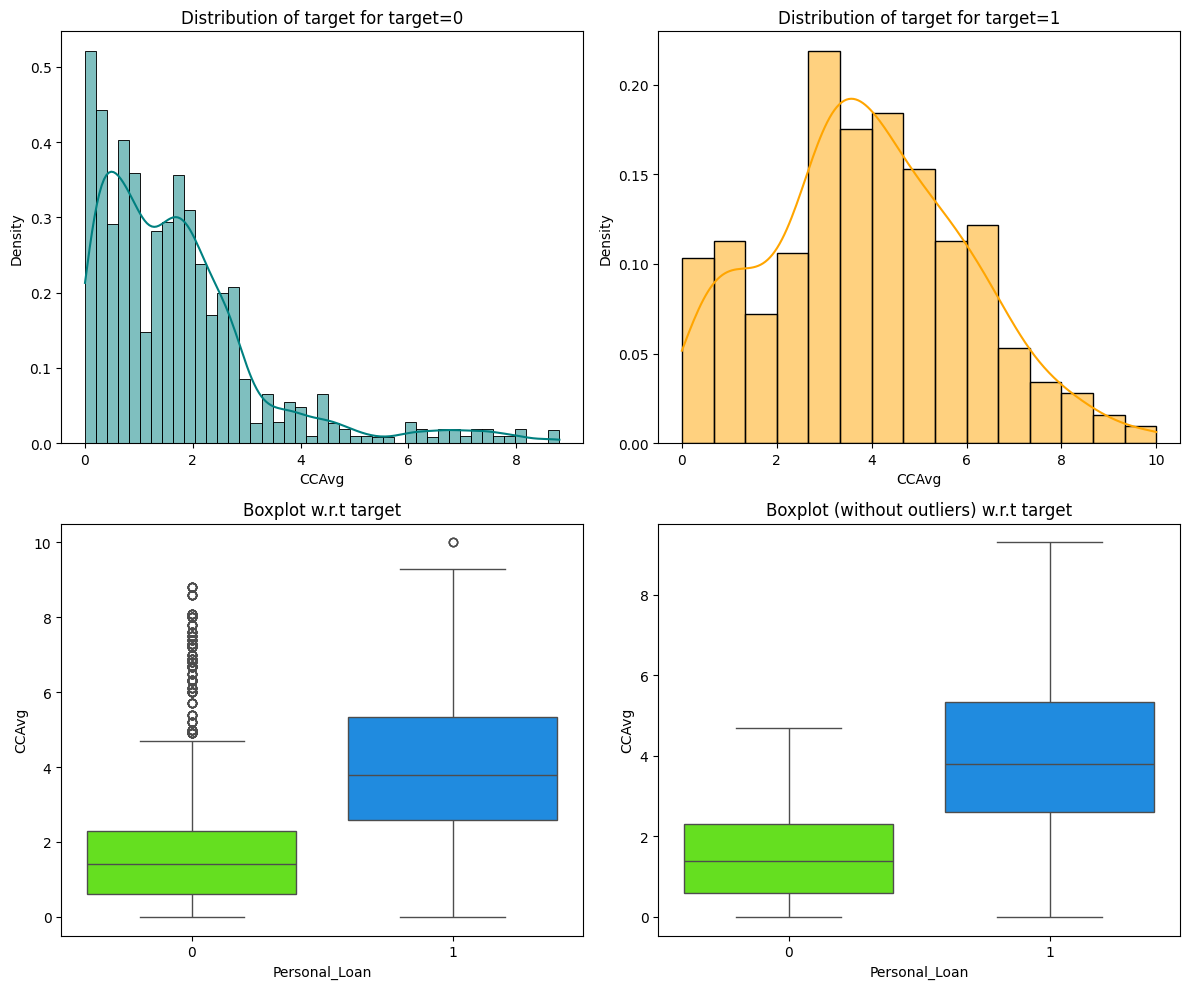

In [47]:
distribution_plot_wrt_target(loan_data,'CCAvg','Personal_Loan')

> Observations reveal that the mean value of CCAvg for customers not accepting a personal loan is approximately `$1.6K`, significantly lower than the mean value of customers accepting a personal loan, which is approximately `$4K`. This suggests that customers who accept personal loans tend to spend more money on a monthly basis.

**Observations**
* Income:
Median income for non-loan takers: `$59K`.
Median income for loan takers: `$142K`. There is a noticeable increase in the number of customers with personal loans in the higher income categories, especially as income rises above `$100K`
* CCAvg (Average spending on credit cards per month):
Median CCAvg for non-loan takers: `$1.4`.
Median CCAvg for loan takers: `$3.8`.
It seems that loan takers have a median CCAvg that is about 171% higher than non-loan takers.
* Mortgage:
Median Mortgage for non-loan takers: `$0` (indicating a large number with no mortgage).
Median Mortgage for loan takers: `$0` (also indicating a large number with no mortgage), but a much higher 75th percentile, suggesting a greater number of loan takers with higher mortgages.
It seems that loan takers who do have a mortgage have values that can be substantially higher than those of non-loan takers.
* Family:
Median family size for non-loan takers: 2.
Median family size for loan takers: 3.
It seems that loan takers have a median family size that is 50% larger than non-loan takers.
* Age and Experience:
Both these features show minimal difference in medians between loan takers and non-loan takers, suggesting less influence on the likelihood of taking a loan.

#### Personal Loan v/s Category columns

##### Family VS Personal_Loan

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


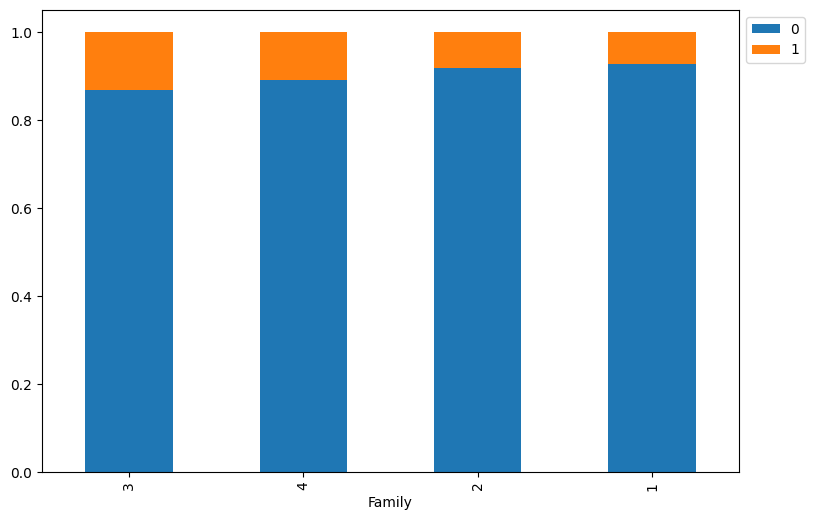

In [48]:
stacked_barplot(loan_data,'Family','Personal_Loan')

> Observations indicate that families with a size of 3 or 4 have a higher proportion of accepting a personal loan. Therefore, as family size increases, customers appear to be more inclined to accept personal loans

##### Education VS Personal_Loan

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


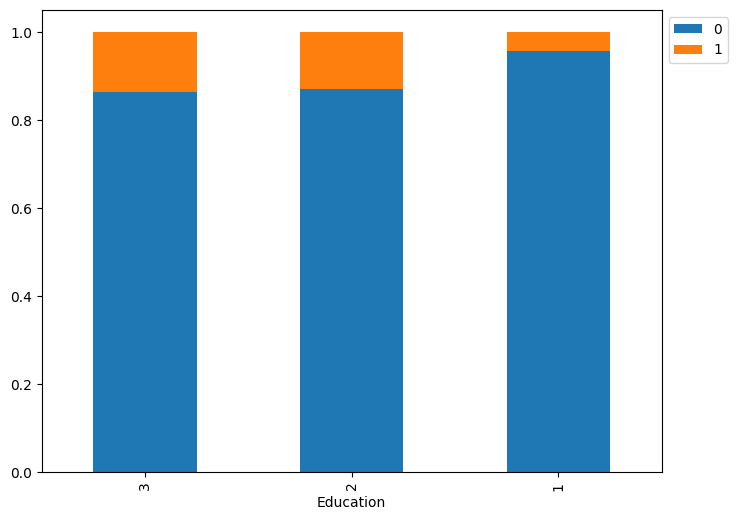

In [49]:
stacked_barplot(loan_data,'Education','Personal_Loan')

> Observations reveal that customers with education levels 2 and 3 are more inclined to accept a personal loan compared to those with education level 1. Among them, customers with education level 3 demonstrate the highest proportion of acceptance

##### Securities_Account VS Personal_Loan

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


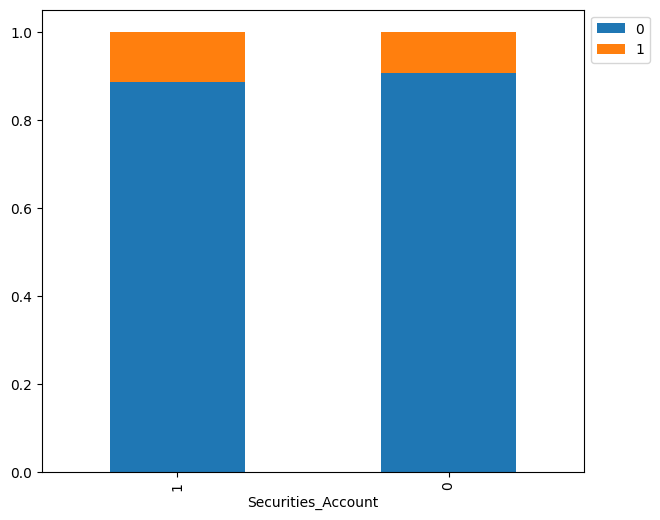

In [50]:
stacked_barplot(loan_data,'Securities_Account','Personal_Loan')

> Observations suggest that customers with a security account are more inclined to accept a personal loan

##### CD_Account VS Personal_Loan

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


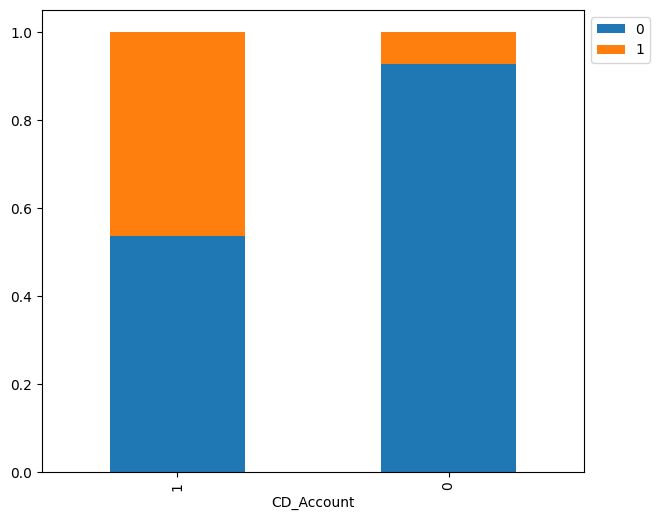

In [51]:
stacked_barplot(loan_data,'CD_Account','Personal_Loan')

> Observations indicate that customers with a CD account are more inclined to accept a personal loan

##### Online VS Personal_Loan

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


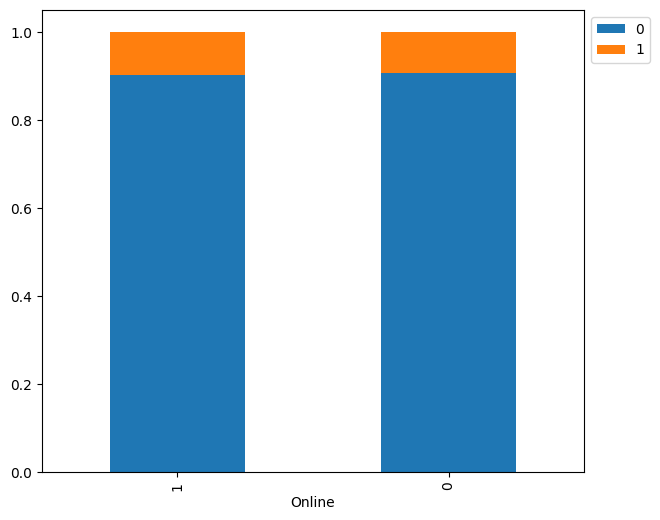

In [52]:
stacked_barplot(loan_data,'Online','Personal_Loan')

> It is observed that customers who use iternet banking services and who do not use internet banking services are almost equally likely to accept personal loans

##### CreditCard VS Personal_Loan

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


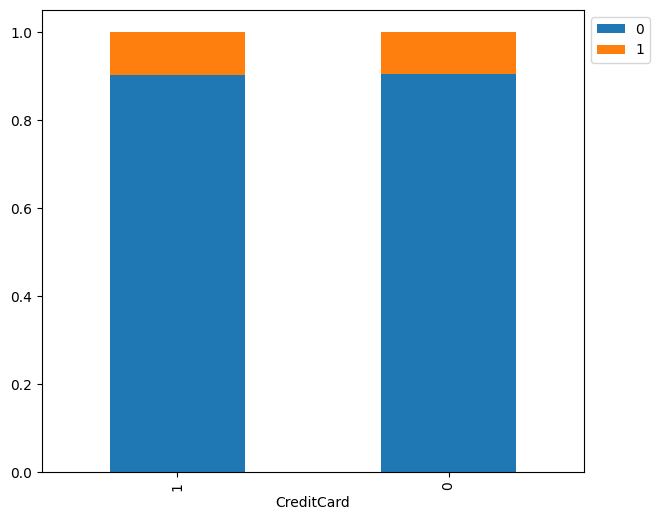

In [53]:
stacked_barplot(loan_data,'CreditCard','Personal_Loan')

> It is observed that customers who use credit cards issued by other banks and those who do not are almost equally likely to accept personal loans

### Questions & Answers

**Question 1:** What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

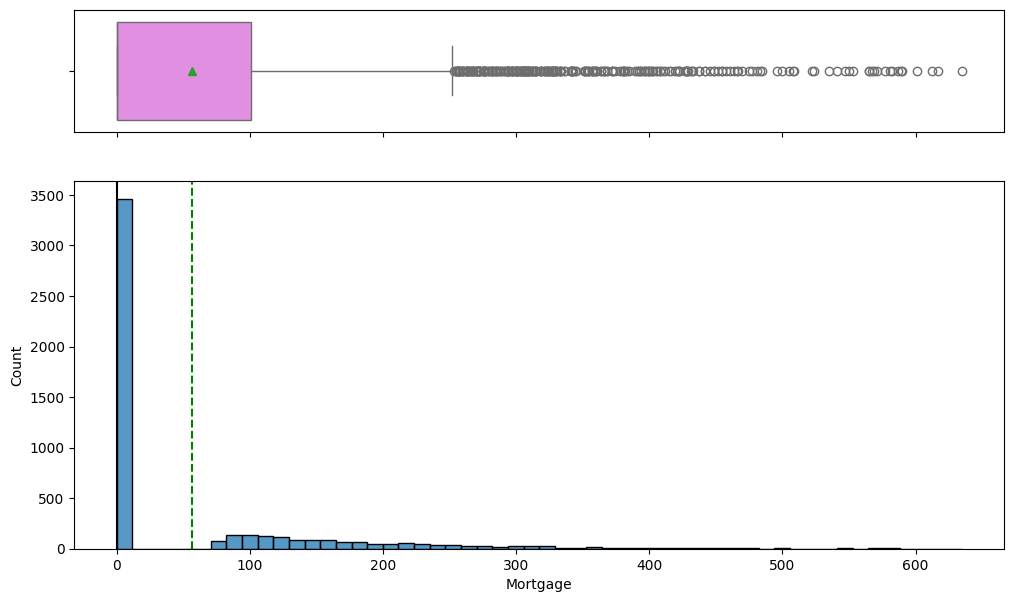

In [54]:
histogram_boxplot(loan_data, "Mortgage")

**Answer 1:** The distribution of the Mortgage attribute shows that a significant number of customers do not have a mortgage, as indicated by the peak at the zero value in the histogram. The distribution is right-skewed, meaning there are customers with high mortgage values, but they are relatively fewer. The boxplot further highlights this skewness and reveals outliers in the mortgage values. These outliers are values that lie far from the median, indicating a small number of customers with very high mortgage amounts compared to the rest.

These observations suggest that while most customers may not have a significant mortgage value, there is a range of variability among those who do, with a few cases showing exceptionally high values. This attribute could be an interesting factor to consider in the model, as it might relate to the financial stability or preferences regarding loan products among different customers



---



**Question 2: How many customers have credit cards?**

In [55]:
# Calculate the number of customers with credit cards
num_customers_credit_card = loan_data['CreditCard'].astype(int).sum()

num_customers_credit_card


np.int64(1470)

**Answer 2: There are 1,470 customers with credit cards in the dataset**



---



**Question3: What are the attributes that have a strong correlation with the target attribute (personal loan)?**

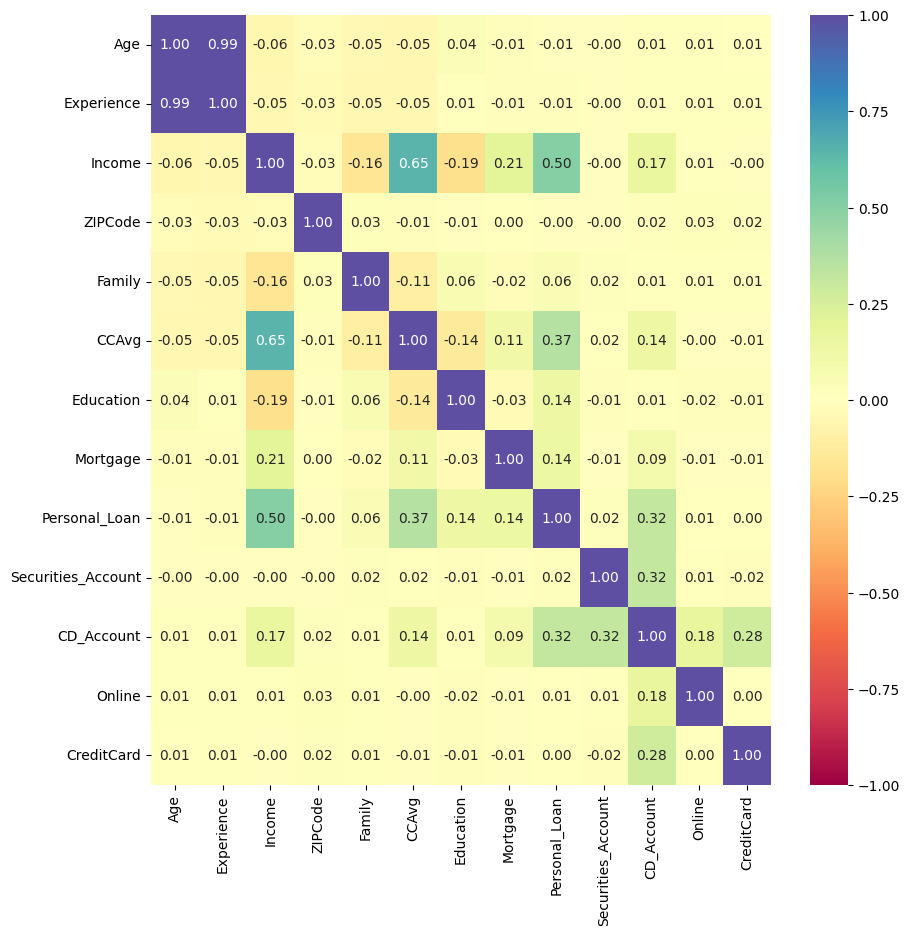

In [56]:
plt.figure(figsize=(10, 10))
sns.heatmap(loan_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Answer 3: The attributes that have a strong correlation with the target attribute (Personal Loan) are:**



*   Income: Positive correlation (0.50), indicating higher income levels are associated with a greater likelihood of accepting a personal loan.

*   CCAvg: Positive correlation (0.37), suggesting that higher average credit card spending per month is associated with a higher probability of taking a personal loan.

*   CD_Account: Positive correlation (0.32), meaning customers with a certificate of deposit (CD) account are more likely to accept a personal loan.


*  Education: Positive correlation (0.14), implying higher education levels are somewhat associated with a higher likelihood of taking a personal loan.






---



**Question 4: How does a customer's interest in purchasing a loan vary with their age?**

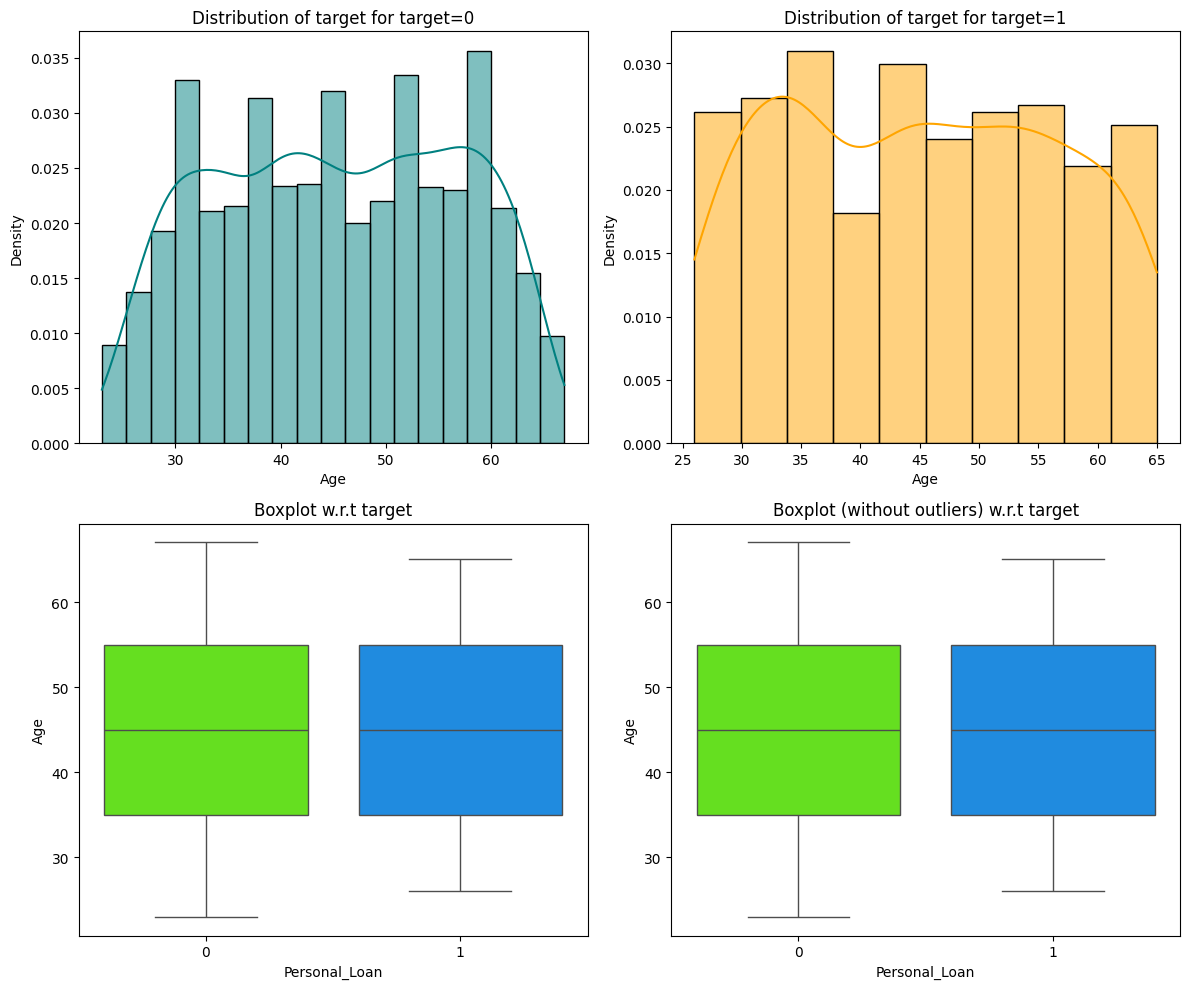

In [57]:
distribution_plot_wrt_target(loan_data, "Age", "Personal_Loan")

**Answer 4:**

It appears that the interest in personal loans is distributed across a wide range of ages, with no clear trend indicating that a particular age group is significantly more likely to be interested in personal loans than others. Both interested and not interested customers are spread across the age spectrum, suggesting that age alone may not be a strong predictor of interest in personal loans. Other factors, as identified earlier like income, CCAvg, CD_Account, and education level, might play more significant roles in determining a customer's likelihood to purchase a personal loan



---



**Question 5: How does a customer's interest in purchasing a loan vary with their education?**

<Figure size 1200x800 with 0 Axes>

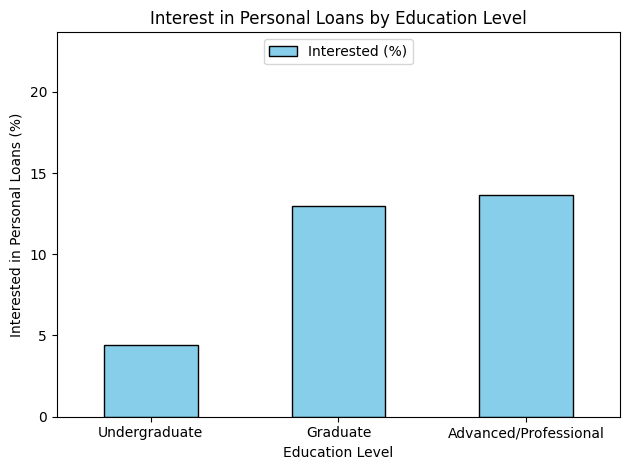

In [58]:
# Group by 'Education' and calculate the percentage interested in personal loans
education_loan_interest = loan_data.groupby('Education')['Personal_Loan'].value_counts(normalize=True).unstack().fillna(0) * 100
education_loan_interest.columns = ['Not Interested (%)', 'Interested (%)']
education_loan_interest['Education Level'] = education_loan_interest.index.map({1: 'Undergraduate', 2: 'Graduate', 3: 'Advanced/Professional'})

# Increase the size of the plot to give more room for the legend
plt.figure(figsize=(12, 8))  # Adjusting figure size
ax = education_loan_interest[['Interested (%)']].plot(kind='bar', color='skyblue', edgecolor='black', legend=False)
plt.title('Interest in Personal Loans by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Interested in Personal Loans (%)')
plt.xticks(ticks=range(3), labels=['Undergraduate', 'Graduate', 'Advanced/Professional'], rotation=0)
plt.ylim(0, education_loan_interest['Interested (%)'].max() + 10)  # Adjust y-limit to leave space for legend

# Add legend at the top center inside the plot
ax.legend(['Interested (%)'], loc='upper center', bbox_to_anchor=(0.5, 1), ncol=1)

plt.tight_layout()
plt.show()

**Answer 5:** The analysis reveals a positive correlation between education level and interest in personal loans, illustrated by percentages: 4.44% of undergraduates, 12.97% of graduates, and 13.66% of advanced/professional degree holders show interest.

This trend suggests that higher educational attainment might influence individuals to view personal loans more favorably, possibly due to increased financial needs or ambitions. These insights could inform financial institutions in tailoring their marketing strategies and product offerings to different educational demographics.





## <span style="color:blue">Data Preprocessing (contd.)



### Outlier Detection

In [59]:
# To find the 25th percentile and 75th percentile.
numeric_cols = loan_data.select_dtypes(include=['number'])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [60]:
(
    (loan_data.select_dtypes(include=["float64", "int64"]) < lower)
    | (loan_data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(loan_data) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

### Data Preparation for Modeling
* **We're removing the "Experience" variable due to its perfect correlation with "Age". Furthermore, we will One-Hot encode the categorical variables "ZIPCode" and "Education" to gain more meaningful insights.**

In [61]:
# dropping Experience as it is perfectly correlated with Age
X = loan_data.drop(["Personal_Loan", "Experience"], axis=1)
y = loan_data["Personal_Loan"]

In [62]:
# encoding the categorical variables
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)
X.head()

Age  Income  Family  CCAvg  Mortgage Securities_Account CD_Account Online  \
0   25      49       4    1.6         0                  1          0      0   
1   45      34       3    1.5         0                  1          0      0   
2   39      11       1    1.0         0                  0          0      0   
3   35     100       1    2.7         0                  0          0      0   
4   35      45       4    1.0         0                  0          0      0   

  CreditCard  ZIPCode_91  ZIPCode_92  ZIPCode_93  ZIPCode_94  ZIPCode_95  \
0          0        True       False       False       False       False   
1          0       False       False       False       False       False   
2          0       False       False       False        True       False   
3          0       False       False       False        True       False   
4          1        True       False       False       False       False   

   ZIPCode_96  Education_2  Education_3  
0       False        False        False  
1       False        False        False  
2       False        False        False  
3       False         True        False  
4       False         True        False

**Creating training and test sets.**

It was observed that there is a significant class imbalance in the target variable, with the vast majority of customers (90.4%) not accepting personal loans. Therefore, it is necessary to use **stratify=y** to mitigate this imbalance

In [63]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [64]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (4000, 17)
Shape of test set :  (1000, 17)
Percentage of classes in training set:
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


## <span style="color:blue">Model Building - Decision Tree Model

### Common functions

In [65]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [66]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [67]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    Prints the recall score from model
    model : classifier to predict values of X
    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

### Model Evaluation Criterion

**Priority of Cases**
Given that the primary goal of the campaign is to expand the customer base, overlooking a potential customer equates to a missed opportunity. It is crucial for sales and marketing teams to identify every prospective client. Consequently, the focus should be on minimizing Missed Opportunities.

**Model inaccuracies can manifest in several ways, including:**

* False Positives: Predicting a customer will secure a loan when, in fact, they do not. This scenario results in a Waste of Resources.
* False Negatives: Predicting a customer will not secure a loan when they actually do. This leads to a Missed Opportunity.

**Strategy to Minimize Missed Opportunities**
To decrease the occurrence of false negatives, it's vital to enhance the model's **Recall**. A higher Recall rate improves the model's ability to accurately identify potential customers, thereby reducing missed opportunities.


### <span style="color:blue">Baseline Model

#### Build Decision Tree Model

*   We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.
* It was observed that there is a significant class imbalance in the target variable, with the vast majority of customers (90.4%) not accepting personal loans. Therefore, it is necessary to adjust the class_weight parameter to mitigate this imbalance

In [68]:
base_model = DecisionTreeClassifier(criterion="gini", class_weight='balanced', random_state=1)
base_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training data

##### Confusion Matrix

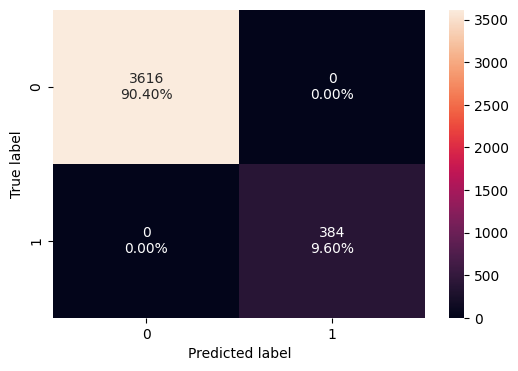

In [69]:
confusion_matrix_sklearn(base_model, X_train, y_train)

##### Model score

In [70]:
decision_tree_perf_train = model_performance_classification_sklearn(
    base_model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

#### Checking model performance on test data

##### Confusion Matrix

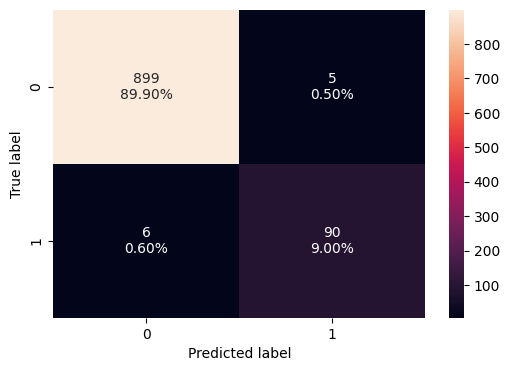

In [71]:
confusion_matrix_sklearn(base_model, X_test, y_test)

In [72]:
decision_tree_perf_test = model_performance_classification_sklearn(base_model, X_test, y_test)
decision_tree_perf_test

Accuracy  Recall  Precision        F1
0     0.989  0.9375   0.947368  0.942408

#### Visualizing the Decision Tree

In [73]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


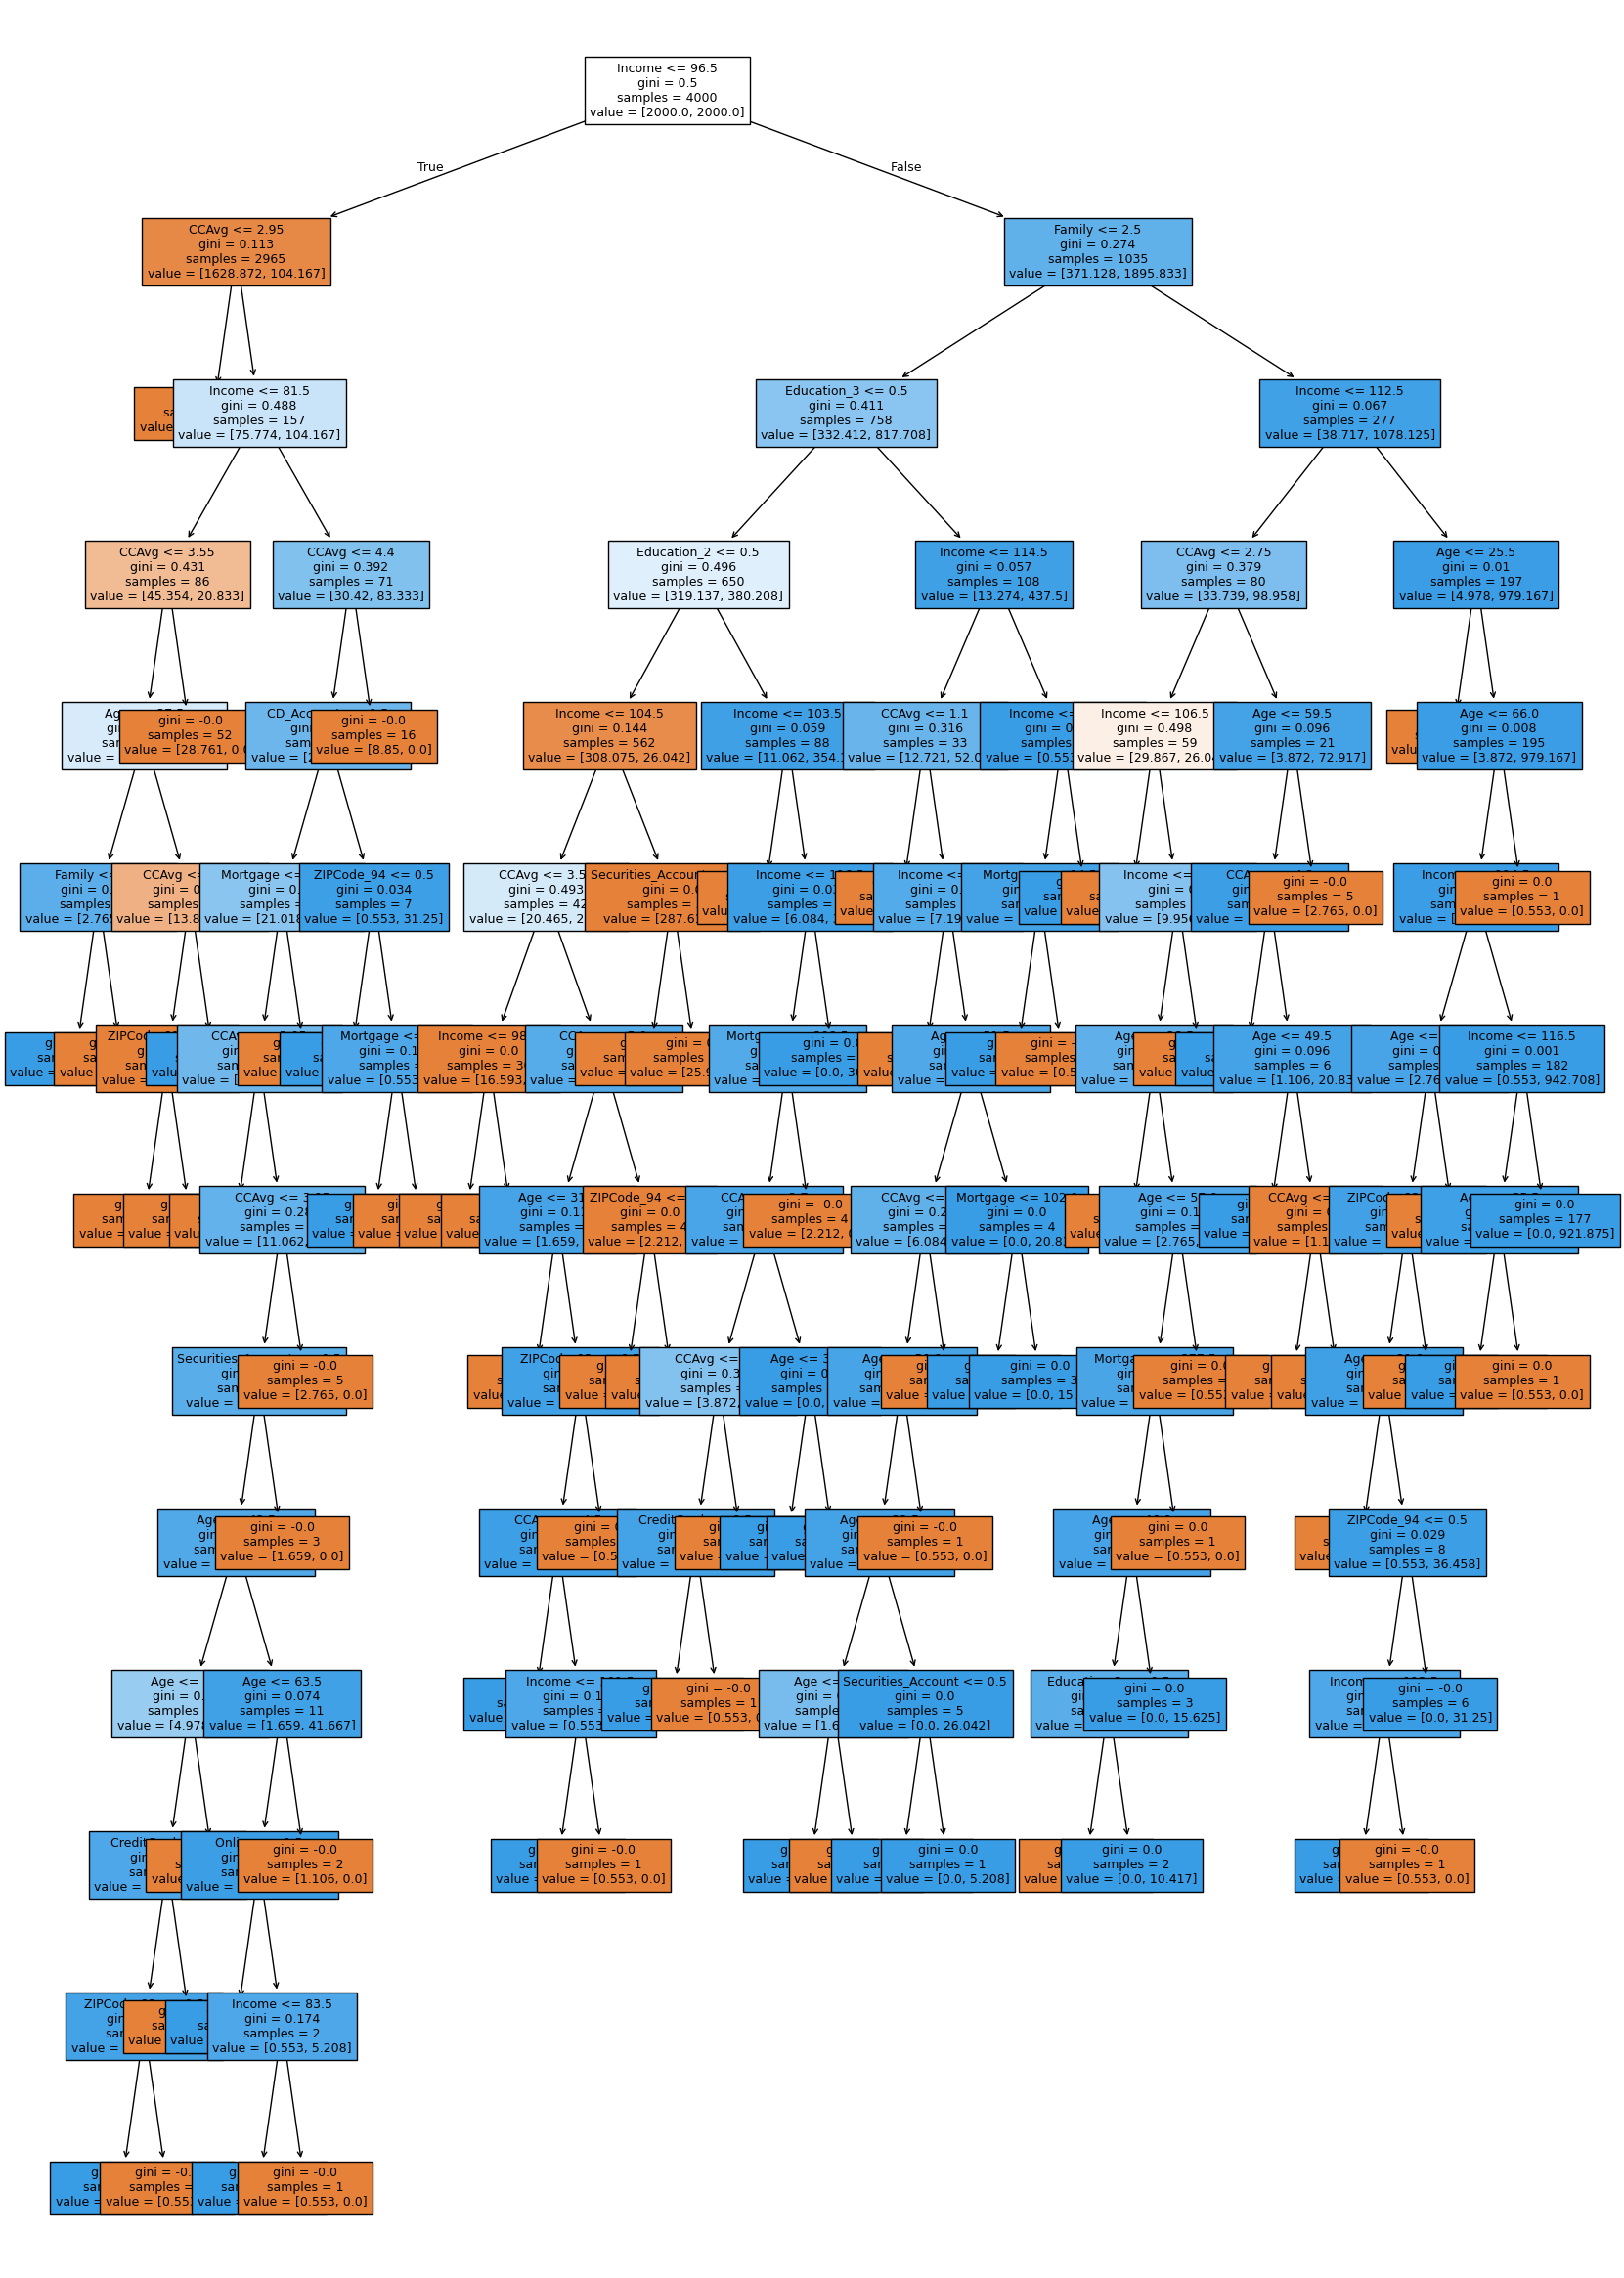

In [74]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(base_model,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=9,
                     node_ids=False,
                     class_names=None,)

#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [75]:
# Text report showing the rules of a decision tree -

print(tree.export_text(base_model, feature_names=feature_names, show_weights=True))

|--- Income <= 96.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1553.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- CCAvg <= 3.55
|   |   |   |   |--- Age <= 37.50
|   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |--- weights: [0.00, 15.62] class: 1
|   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |--- weights: [2.77, 0.00] class: 0
|   |   |   |   |--- Age >  37.50
|   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- weights: [12.72, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_91 >  0.50
|   |   |   |   |   |   |   |--- weights: [1.11, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.35
|   |   |   |   |   |   |--- weights: [0.00, 5.21] class: 1
|   |   |   |--- CCAvg >  3.55
|   |   |   |   |--- weights: [28.76, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- CD_Account <= 0.50
|   |   | 

#### Computing tree complexity

In [76]:
#let us get the max depth of basemodel to have an idea how to tune our parameters
print(f'''The max depth of the base_model =  {base_model.tree_.max_depth}
The node_count ={base_model.tree_.node_count}
The number of leaves = {base_model.tree_.n_leaves}''')

The max depth of the base_model =  13
The node_count =157
The number of leaves = 79


**The base tree is quite complex and appears to be overfitting the training
dataset. Therefore, both pre-pruning and post-pruning should be considered to enhance the model's performance.**

#### Feature importance

In [77]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        base_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Income              6.386194e-01
Education_2         1.387643e-01
CCAvg               9.966168e-02
Education_3         5.138158e-02
Family              3.900841e-02
Age                 1.996673e-02
Mortgage            7.018993e-03
CD_Account          1.617068e-03
Securities_Account  1.269518e-03
ZIPCode_93          1.032968e-03
CreditCard          1.000000e-03
ZIPCode_92          5.252101e-04
ZIPCode_94          8.831014e-05
Online              4.585153e-05
ZIPCode_91          9.210921e-18
ZIPCode_96          0.000000e+00
ZIPCode_95          0.000000e+00


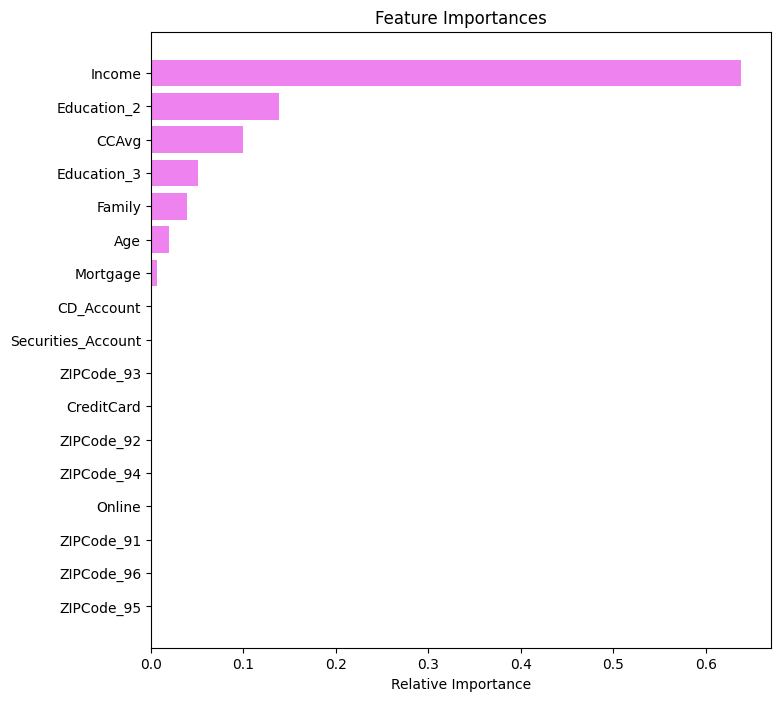

In [78]:
importances = base_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations

> * The model shows `Income` is the most important feature, followed by `Education`, `CCAvg`, and `family`
* The tree is overly complex, having a depth of 13 and 157 nodes.

### <span style="color:blue">Pre-pruning optimization

##### Identifying the best fit model estimator using GridSearchCV

> GridSearchCV optimizes model hyperparameters by exhaustively searching through a predefined grid of parameters, assessing each combination via cross-validation. It automates the selection process to identify the best-fit model estimator, enhancing model performance and accuracy

In [79]:
# Define a scoring function that emphasizes both precision and recall
scorer = make_scorer(recall_score)

# Updated grid of parameters to choose from
parameters = {
    'max_depth': [None, 2,4,6,8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, {0:0.5, 1:1.5}]
}

# Creating the Decision Tree Classifier
estimator = DecisionTreeClassifier(random_state=1)

# Grid Search to find the best parameters
grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring=scorer, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Evaluate on the test set
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Calculate recall and precision on the test set
test_recall = recall_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)

(best_params, test_recall, test_precision)


({'class_weight': {0: 0.5, 1: 1.5},
  'max_depth': 6,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 10},
 0.9479166666666666,
 0.8053097345132744)

##### Checking performance on training data

###### Confusion Matrix

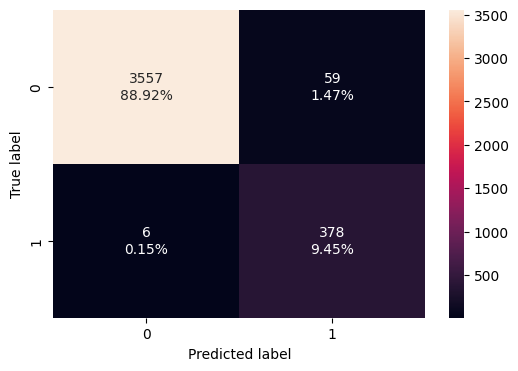

In [80]:
confusion_matrix_sklearn(best_estimator, X_train, y_train)

###### Model score

In [81]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    best_estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0   0.98375  0.984375   0.864989  0.920828

##### Checking performance on test data

###### Confusion Matrix

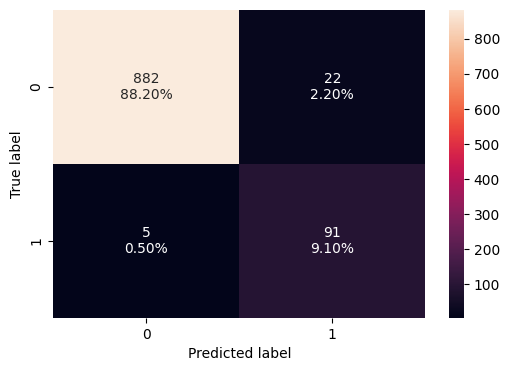

In [82]:
confusion_matrix_sklearn(best_estimator, X_test, y_test)

###### Model score

In [83]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(best_estimator, X_test, y_test)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0     0.973  0.947917    0.80531  0.870813

##### Visualizing the Decision Tree



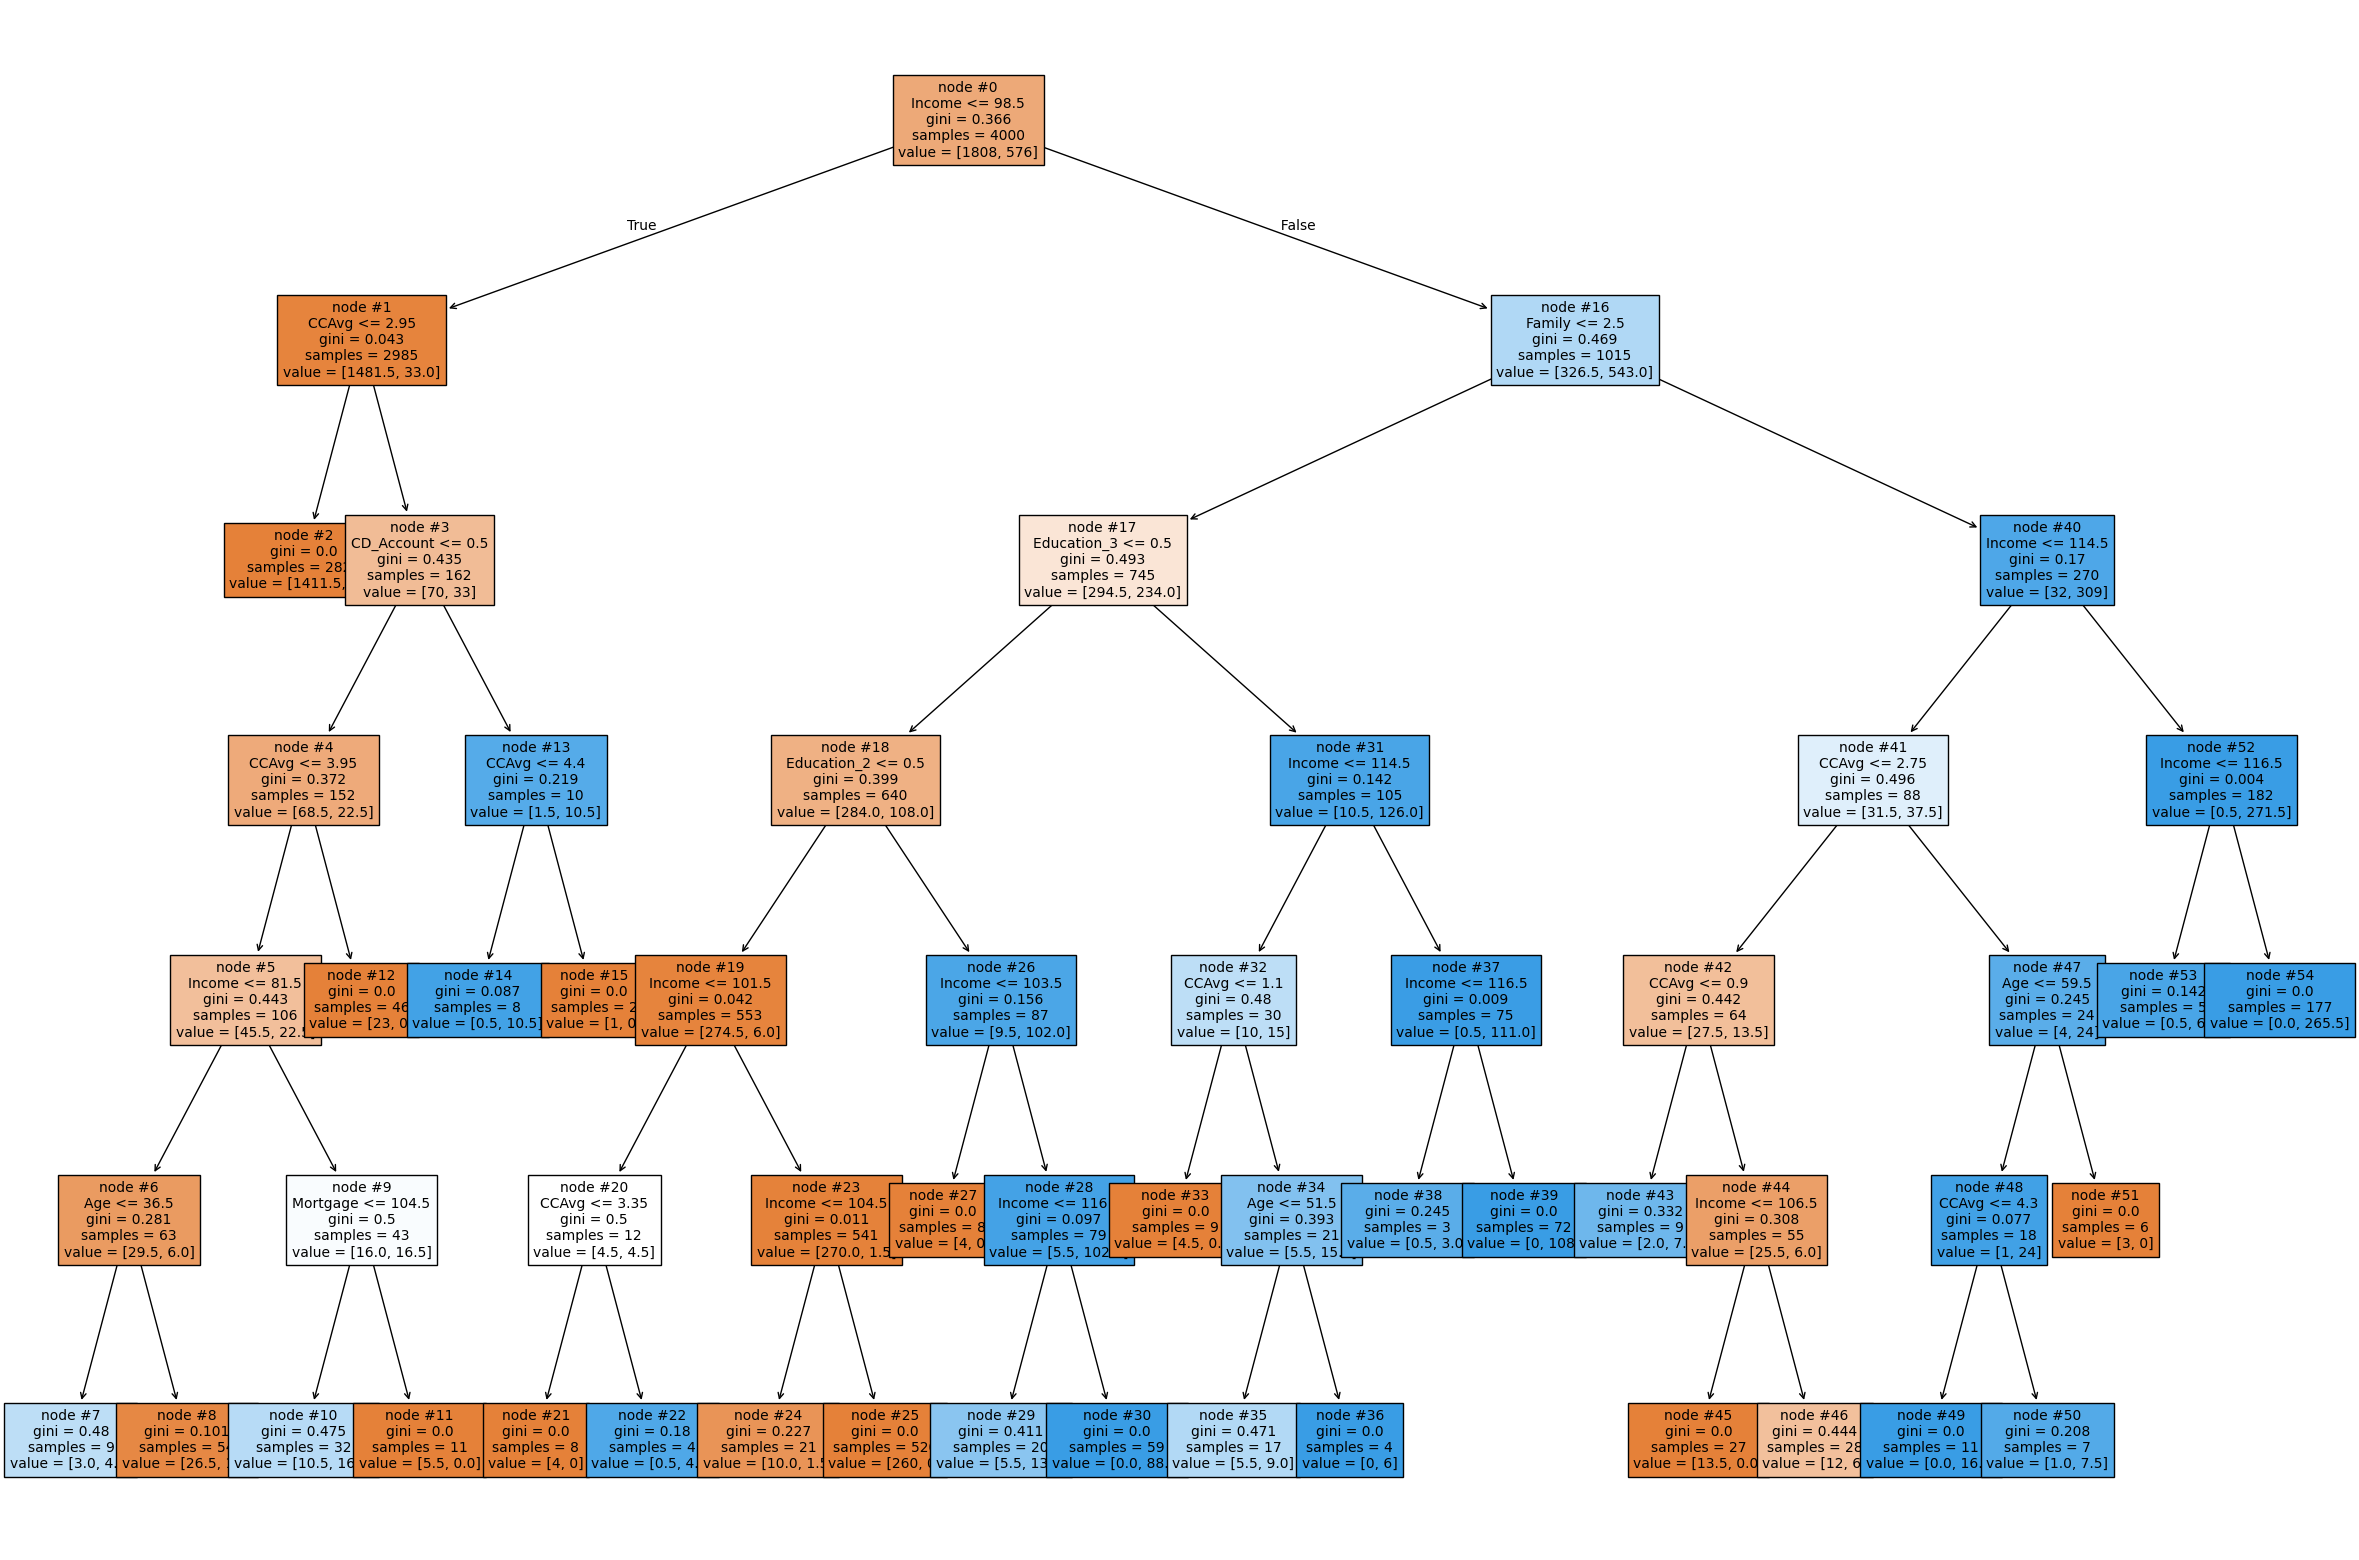

In [84]:
plt.figure(figsize=(30, 20))
out = tree.plot_tree(best_estimator,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=10,
                     node_ids=True,
                     class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [85]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1411.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- weights: [3.00, 4.50] class: 1
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- weights: [26.50, 1.50] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- Mortgage <= 104.50
|   |   |   |   |   |   |--- weights: [10.50, 16.50] class: 1
|   |   |   |   |   |--- Mortgage >  104.50
|   |   |   |   |   |   |--- weights: [5.50, 0.00] class: 0
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.00, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- weights: [0.50, 10.50] class: 1
|   |   |   |--- CCAvg >  4.40
|   |   |   |   |--- weights: [1.00, 0.00] class: 0
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- E

##### Computing tree complexity

In [86]:
#let us get the max depth to have an idea how to tune our parameters
print(f'''The max depth of the tree =  {best_estimator.tree_.max_depth}
The node_count ={best_estimator.tree_.node_count}
The number of leaves = {best_estimator.tree_.n_leaves}''')

The max depth of the tree =  6
The node_count =55
The number of leaves = 28


##### Features importance

In [87]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.548966
Education_2         0.155213
Family              0.108478
Education_3         0.103479
CCAvg               0.057712
Age                 0.011810
CD_Account          0.010183
Mortgage            0.004159
Securities_Account  0.000000
CreditCard          0.000000
Online              0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_94          0.000000
ZIPCode_93          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000


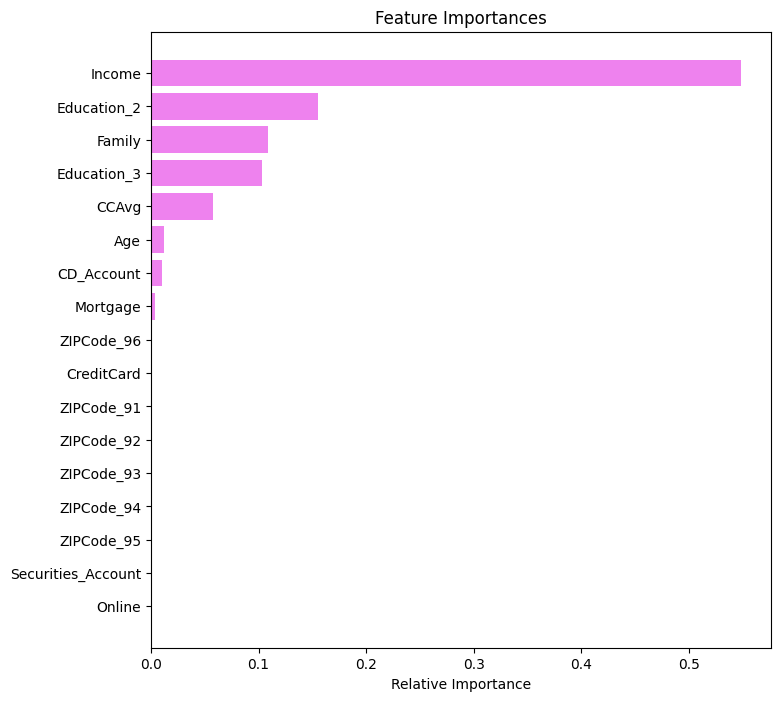

In [88]:
importances = best_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

##### Observations

> * The model shows `Income` is the most important feature, followed by `Education`,`family` and `CCAvg`
* The tree is little less complex, having a depth of `10` and `83` nodes.

### <span style="color:blue">PostPruning optimization (Cost complexity pruning)


Cost complexity pruning reduces overfitting in decision trees by trimming less significant nodes, controlled by the ccp_alpha parameter. Increasing ccp_alpha leads to a simpler tree, enhancing its ability to generalize to new data.

##### CCP_ALPHAs vs Impurities

In [89]:
clf = DecisionTreeClassifier(random_state=1, class_weight=best_params.get("class_weight")) ## Utilizing the same class weight for genuine comparison.
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [90]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000197    0.000393
2     0.000200    0.000794
3     0.000206    0.001206
4     0.000209    0.001623
5     0.000209    0.002042
6     0.000315    0.002357
7     0.000315    0.002671
8     0.000315    0.003300
9     0.000360    0.003660
10    0.000360    0.004379
11    0.000378    0.004757
12    0.000378    0.005134
13    0.000393    0.005527
14    0.000403    0.005930
15    0.000417    0.007181
16    0.000438    0.008058
17    0.000490    0.009037
18    0.000607    0.010251
19    0.000701    0.010952
20    0.000716    0.011667
21    0.000839    0.015023
22    0.001002    0.017026
23    0.001050    0.018076
24    0.001057    0.019134
25    0.001133    0.020266
26    0.001269    0.021535
27    0.001325    0.022860
28    0.001375    0.025609
29    0.001432    0.027041
30    0.001482    0.028523
31    0.001510    0.030033
32    0.001606    0.033244
33    0.001657    0.034901
34    0.001787    0.036688
35    0.002071    0.038759
36    0.002197    0.040956
37    0.002680    0.043636
38    0.002913    0.046549
39    0.003505    0.050054
40    0.003889    0.053943
41    0.008267    0.062210
42    0.009546    0.071756
43    0.042127    0.198137
44    0.168333    0.366470

##### Total Impurity vs effective alpha

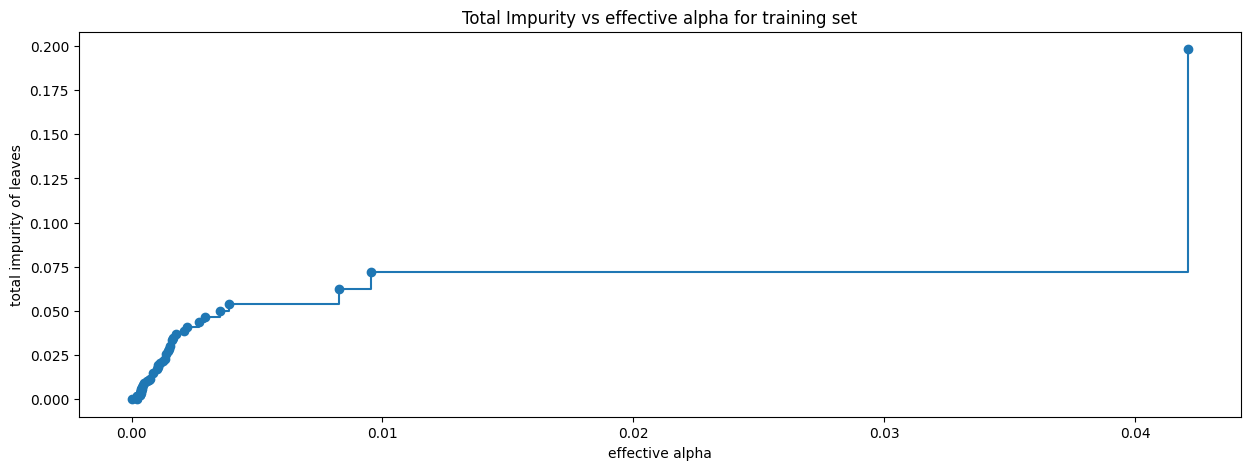

In [91]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

##### Nodes vs Alpha

In [92]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight=best_params.get("class_weight")) ## Utilizing the same class weight for genuine comparison.
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1683330927768041


> For the rest, we take out the last element from both clfs and ccp_alphas, since it's the simplest tree with just one node. We demonstrate here that as alpha goes up, the number of nodes and the depth of the tree go down.

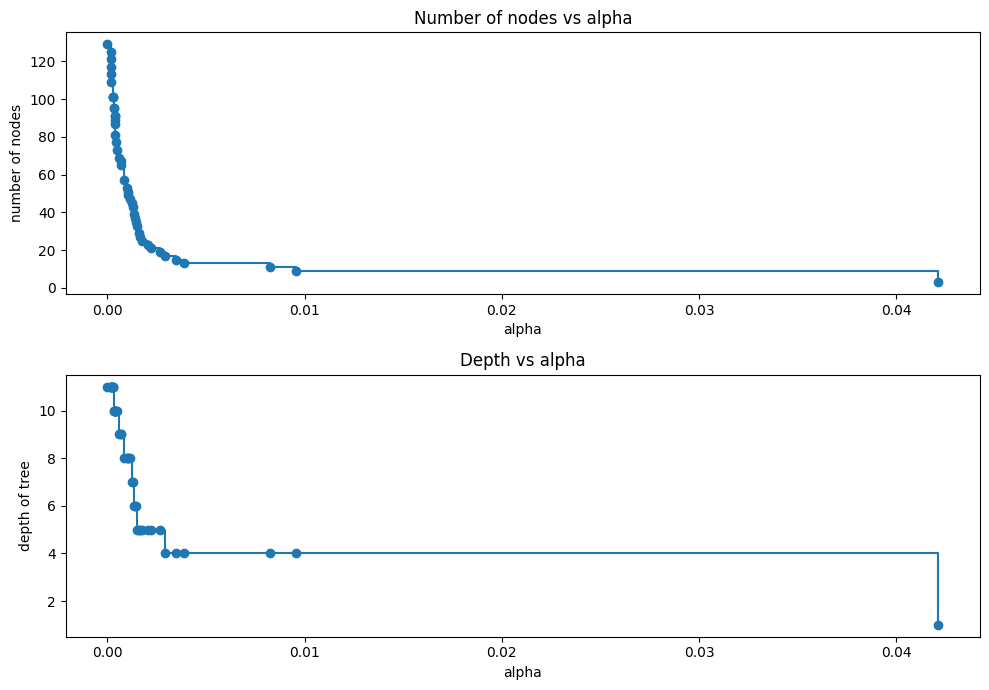

In [93]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

> When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better

##### Recall vs alpha for training and testing sets

In [94]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

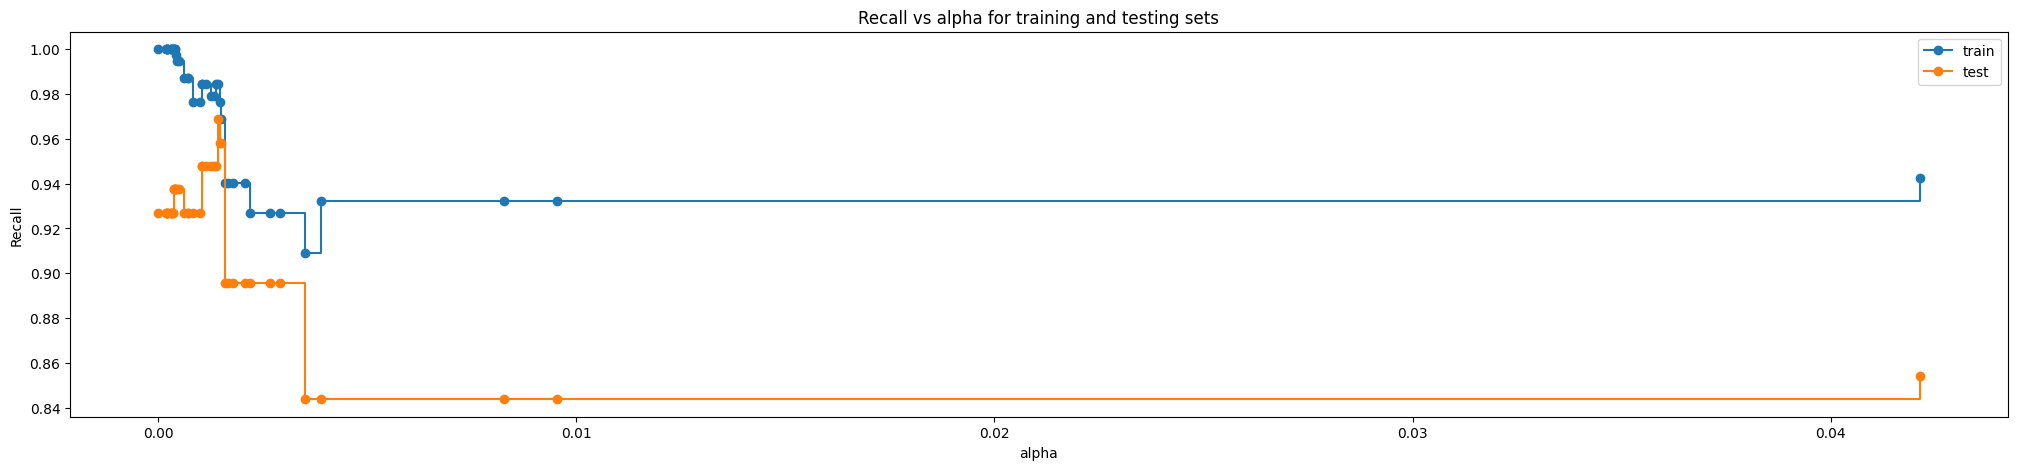

In [95]:
fig, ax = plt.subplots(figsize=(25, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Since our goal is to increase the recall score, we'll use the above observation to determine optimal ccp_alpha**

##### Using ccp_alpha to build the model

In [96]:
index_best_model = np.argmax(recall_test)
best_estimator_2 = clfs[index_best_model]
print(best_estimator_2)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0014315522285320934),
                       class_weight={0: 0.5, 1: 1.5}, random_state=1)


##### Checking performance on training data

###### Confusion Matrix

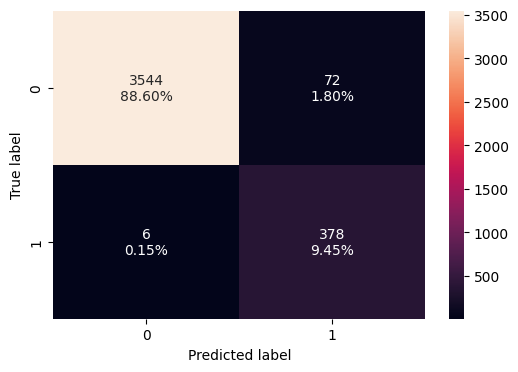

In [97]:
confusion_matrix_sklearn(best_estimator_2, X_train, y_train)

###### Model score

In [98]:
decision_tree_tune_post_train = model_performance_classification_sklearn(best_estimator_2, X_train, y_train)
decision_tree_tune_post_train

Accuracy    Recall  Precision        F1
0    0.9805  0.984375       0.84  0.906475

##### Checking performance on test data

###### Confusion Matrix

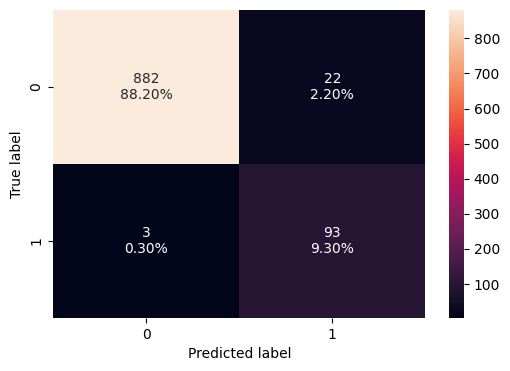

In [99]:
confusion_matrix_sklearn(best_estimator_2, X_test, y_test)

In [100]:
decision_tree_tune_post_test = model_performance_classification_sklearn(best_estimator_2, X_test, y_test)
decision_tree_tune_post_test

Accuracy   Recall  Precision        F1
0     0.975  0.96875   0.808696  0.881517

##### Visualizing the Decision Tree

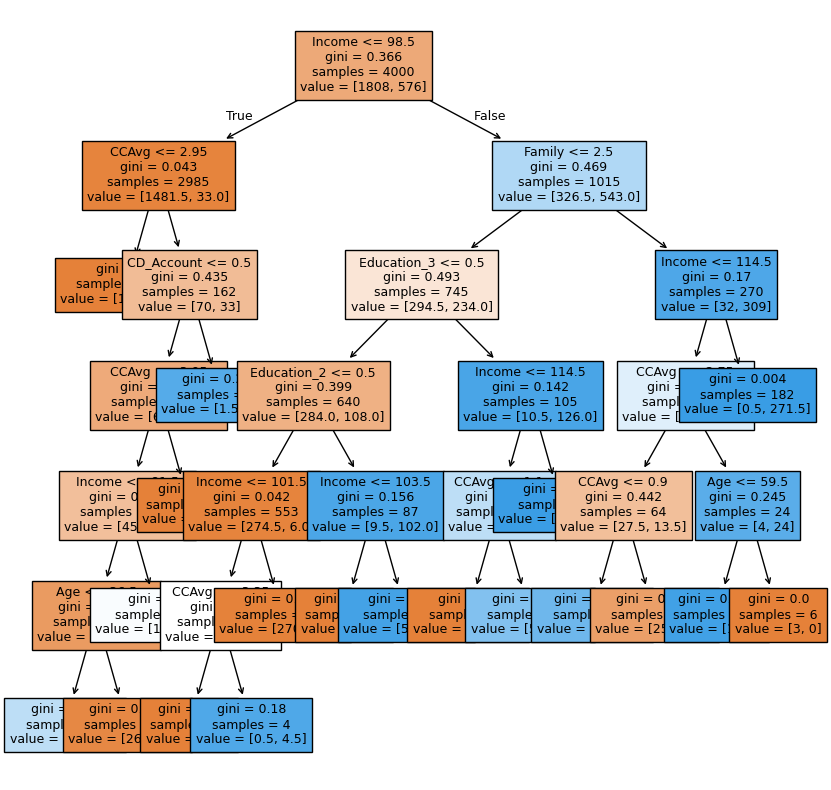

In [101]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    best_estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [102]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1411.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- weights: [3.00, 4.50] class: 1
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- weights: [26.50, 1.50] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- weights: [16.00, 16.50] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.00, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [1.50, 10.50] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 101.50
|   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.35
|   |   |   |   |   |   |--- weights: 

##### Computing tree complexity

In [103]:
#let us get the max depth to have an idea how to tune our parameters
print(f'''The max depth of the model =  {best_estimator_2.tree_.max_depth}
The node_count ={best_estimator_2.tree_.node_count}
The number of leaves = {best_estimator_2.tree_.n_leaves}''')

The max depth of the model =  6
The node_count =37
The number of leaves = 19


##### Feature importance

In [104]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.550604
Education_2         0.157397
Family              0.110004
Education_3         0.104934
CCAvg               0.056268
Age                 0.010467
CD_Account          0.010326
Mortgage            0.000000
Securities_Account  0.000000
CreditCard          0.000000
Online              0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_94          0.000000
ZIPCode_93          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000


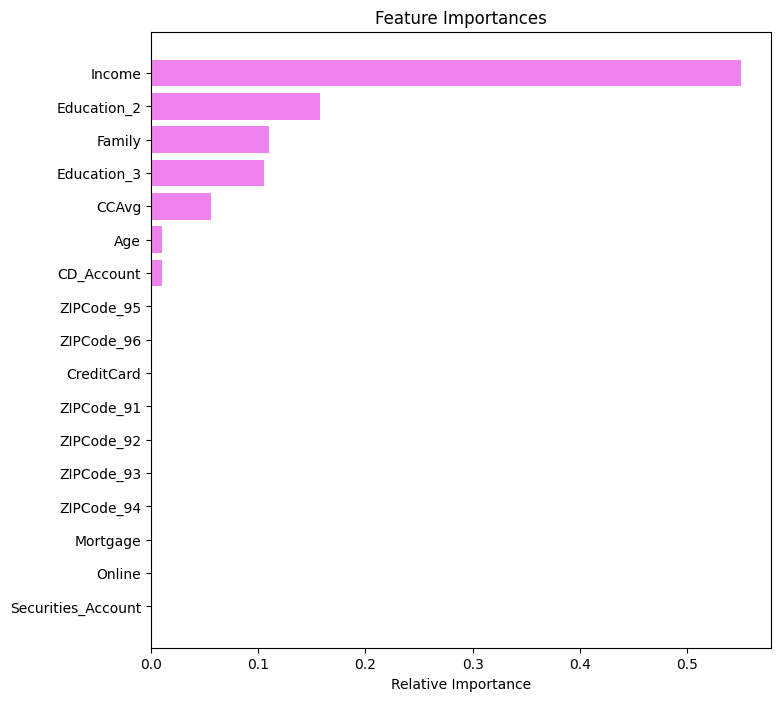

In [105]:
importances = best_estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

##### Observation

* The model shows Income is the most important feature, followed by Education,
family and CCAvg
* The tree is very optimial with a depth of 6 and 37 nodes.

## <span style="color:blue">Model Comparison and Final Model Selection

### Training performance comparison

In [106]:
def print_with_custom_format(df):
    # Print column headers
    print("              ", " | ".join(df.columns))
    print("-" * 60)  # Just for formatting

    for index, row in df.iterrows():
        if index == 'Node Count':
            # Format and print "Node Count" row with integers
            formatted_row = [f"{int(value)}" if column in ['Baseline', 'Pre-Pruning', 'Post-Pruning'] else f"{value}" for column, value in row.items()]
            print(f"{index:<14}", "    |  ".join(formatted_row))
        else:
            # Format and print all other rows with their original formatting
            formatted_row = [f"{value:.4f}" if isinstance(value, float) and not pd.isnull(value) else f"{value}" for value in row]
            print(f"{index:<14}", " | ".join(formatted_row))

In [107]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Baseline", "Pre-Pruning", "Post-Pruning"]
models_train_comp_df.loc['Node Count'] = [
    int(base_model.tree_.node_count),
    int(best_estimator.tree_.node_count),
    int(best_estimator_2.tree_.node_count)
]
models_train_comp_df.loc['Node Count'] = models_train_comp_df.loc['Node Count'].apply(int)
print("Training Decision Tree performance comparison:\n")
print_with_custom_format(models_train_comp_df)

Training Decision Tree performance comparison:

               Baseline | Pre-Pruning | Post-Pruning
------------------------------------------------------------
Accuracy       1.0000 | 0.9838 | 0.9805
Recall         1.0000 | 0.9844 | 0.9844
Precision      1.0000 | 0.8650 | 0.8400
F1             1.0000 | 0.9208 | 0.9065
Node Count     157    |  55    |  37


### Testing performance comparison

In [108]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Baseline", "Pre-Pruning", "Post-Pruning"]
models_test_comp_df.loc['Node Count'] = [
    int(base_model.tree_.node_count),
    int(best_estimator.tree_.node_count),
    int(best_estimator_2.tree_.node_count)
]
print("Testing Decision Tree performance comparison:\n")
print_with_custom_format(models_test_comp_df)

Testing Decision Tree performance comparison:

               Baseline | Pre-Pruning | Post-Pruning
------------------------------------------------------------
Accuracy       0.9890 | 0.9730 | 0.9750
Recall         0.9375 | 0.9479 | 0.9688
Precision      0.9474 | 0.8053 | 0.8087
F1             0.9424 | 0.8708 | 0.8815
Node Count     157    |  55    |  37


### Conclusion

**Observation**

* **Overfitting in Baseline:** The Baseline model shows perfect training scores but drops in test performance, indicating overfitting with its complex structure (157 nodes).
* **Effectiveness of Pruning:** Pre-Pruning and Post-Pruning reduce overfitting by simplifying the model, evident from lower node counts (55 and 37, respectively) and robust test metrics.
* **Balance in Post-Pruning:** The Post-Pruned model, despite slightly lower precision, achieves the highest recall on test data with the simplest structure, making it well-suited for scenarios where catching as many positive cases as possible is prioritized over the precision of those identifications.


**Conclusion:**
Pruning improves generalization and prevents overfitting. The Post-Pruning strategy stands out for its balance between model simplicity and high recall, indicating it as the preferred choice for applications valuing the comprehensive identification of positive cases.

## <span style="color:blue">Actionable Insights and Business Recommendations


**Business Recommendations**


* **Leverage Income Data:** Focus marketing initiatives on targeting customers with an income of `$100K` and above, as income is a significant predictor of a customer's likelihood to be interested in personal loan products. Engage this high-income segment to maximize the potential for loan product uptake.
* **Capitalize on High Income and Education:** Intensify marketing campaigns towards individuals earning above `$100K` and with advanced educational qualifications. Develop premium loan offerings that align with the financial capabilities and sophistication of this customer base.

* **Incorporate Secondary Indicators:** Include considerations of education level, family size, and credit card spending habits in segmenting and targeting, while recognizing their impact is secondary to income.

* **Broader Market Insights:** Do not overlook the moderate influences of age, CD account holdings, and regional factors indicated by ZIP codes. These variables should inform a more nuanced segmentation and personalized marketing strategy.

* **Develop a Personalized Targeting Approach:** Craft personalized marketing strategies for customers with incomes below `$100K`. This group presents an opportunity for market expansion and could benefit from targeted financial products designed to meet their specific circumstances.




___